In [ ]:
# Emilie Helen Wolf
# April 15, 2022

# This project demonstrates my ability to analyze and categorize data of nonfungible
# token sales and transfers from the VeeFriends NFT project (https://veefriends.com/)

# NFT Hackathon
#### Organized by Avery Smith at https://www.datacareerjumpstart.com/

## Problem Statement
We are staring with the `veefriends.csv` dataset which contains sales and transactions of NFTs. We want to understand what's really going on and if there are any patterns. Are certain NFTs more popular? Is there a trend over time? By the end of this notebook, we will have some interesting insights!!!

## Method
0. Check for discrepencies and tidy the data
1. Analyze and visualize the VeeFriends NFT dataset
2. Group the individual NFTs using K-means and Hierarchical Clustering (unsupervised machine learning)
3. Share insights

# 0. Check for Discrepencies and Tidy the Data

In [1]:
# Automatically structures Python code
%load_ext nb_black

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# import standard libraries for manipulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set_style("darkgrid")
sns.set_context("talk")

# Read the CSV and print 8 random rows
vf = pd.read_csv("veefriends.csv")
vf.sample(n=8)

Unnamed: 0        date  asset_id  \
13702       13702  2022-01-13      3728   
14003       14003  2022-01-21      6497   
7382         7382  2021-08-28      8227   
6560         6560  2021-08-19       937   
5958         5958  2021-08-12      9283   
12297       12297  2021-12-11      1680   
4789         4789  2021-08-01      1211   
8696         8696  2021-09-10      2248   

                                     from_address  \
13702  0x88341d1a8f672d2780c8dc725902aae72f143b0c   
14003  0x71c162ce9af8b8a5ab6778eb0442af05e7fa4591   
7382   0xb1c72fee77254725d365be0f9cc1667f94ee7967   
6560   0xdf550a198aa392689aa97e0fcb3838703f501777   
5958   0x7675291453daf025cef152bef7296d4ef9d72514   
12297  0x2d58b5d022afd320d9596b6a770854b94d40c1f8   
4789   0x211913572495504fd51f89b72da1e12c84ababf0   
8696   0x9770f1e479ac07533b7cfd14ec8bcf86832db125   

                                       to_address  \
13702  0x2bc9dfc10e7035864412bb0c602d8449da48226a   
14003  0xbad407f09daec0a68fd227aba7ade79c32a0cb6e   
7382   0x299eae71c3ad6016caecbcf19530cd8828b6fe63   
6560   0x56efed4e01d1c5e71d064eb785ba6973ef12ac63   
5958   0xc3f1c5dad1fc76ae32315b7ab3fd377eba0104ee   
12297  0xfb652a024060e50eb8cb631b0e9031251a45aa5f   
4789   0xbde99a655816615175695780c082332599c536c5   
8696   0x4845481a008417f85980d834fb4b2baa558dc6f8   

                                        transaction_hash       type  \
13702  0x88725d09b30d4090c3602f6b55cb24de6ef2e4bb89ee...  transfers   
14003  0xa17b442c8fe3d9f8f7b77051730dc8274a48f8e137eb...      sales   
7382   0xceb1da17d59d1841cd251610f646a47bcaa6971b2872...      sales   
6560   0x3ef5e46b985d0429dfdee208ab2c93cc4f5898642d3d...  transfers   
5958   0xc015123172c035fe95e9d34c8cf49b78799e085280e5...  transfers   
12297  0xfd9eb52c66a1c687bbdedbcd7d970f2705d1b02aaa36...  transfers   
4789   0x58eaf973cf62dac91750330166fe6e32309425e5d914...  transfers   
8696   0x3895525c98cc2678be60cdc767f2afb2d6a284a281b9...      sales   

       sale_price_eth  sale_price_usd                   name rarity_attribute  \
13702             NaN             NaN              Gift Goat              NaN   
14003           12.69      38267.8371             Mojo Mouse              NaN   
7382             9.15      29897.9910    Serious Sperm Whale              NaN   
6560              NaN             NaN       Bashful Blobfish        Very Rare   
5958              NaN             NaN      Tolerant Tortoise              NaN   
12297             NaN             NaN  Charismatic Chameleon             Rare   
4789              NaN             NaN       Bombastic Baboon             Rare   
8696            17.95      61675.8410          Curious Crane              NaN   

      Editions_attribute  overall_rarity_score category_attribute  \
13702           1 of 555          18935.347683             Mammal   
14003            1 of 20          23646.115524             Mammal   
7382             1 of 20           8284.786528               Fish   
6560              1 of 5          14243.383230               Fish   
5958             1 of 20           6538.568121            Reptile   
12297             1 of 8          18521.444514            Reptile   
4789              1 of 8          11386.734246             Mammal   
8696             1 of 20           7724.516988               Bird   

      benefit_attribute group_attribute adjective_attribute animal_attribute  \
13702               NaN            Gift                Gift             Goat   
14003               NaN       Admission                Mojo            Mouse   
7382                NaN       Admission             Serious      Sperm Whale   
6560                NaN       Admission             Bashful         Blobfish   
5958                NaN       Admission            Tolerant         Tortoise   
12297               NaN       Admission         Charismatic        Chameleon   
4789                NaN       Admission           Bombastic           Baboon   
8696                NaN       A

<IPython.core.display.Javascript object>

In [2]:
# Drop the first column which is just a duplicate index
vf.drop("Unnamed: 0", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [3]:
# Check the shape and missing values
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  16283 non-null  object 
 1   asset_id              16283 non-null  int64  
 2   from_address          16283 non-null  object 
 3   to_address            16283 non-null  object 
 4   transaction_hash      16283 non-null  object 
 5   type                  16283 non-null  object 
 6   sale_price_eth        3991 non-null   float64
 7   sale_price_usd        3991 non-null   float64
 8   name                  15730 non-null  object 
 9   rarity_attribute      7187 non-null   object 
 10  Editions_attribute    16283 non-null  object 
 11  overall_rarity_score  16283 non-null  float64
 12  category_attribute    16283 non-null  object 
 13  benefit_attribute     442 non-null    object 
 14  group_attribute       16283 non-null  object 
 15  adjective_attribute

<IPython.core.display.Javascript object>

In [4]:
# Look at the unique counts for all object columns
vf.describe(include="object").T

count unique  \
date                 16283    315   
from_address         16283   4334   
to_address           16283   5031   
transaction_hash     16283  11367   
type                 16283      2   
name                 15730    248   
rarity_attribute      7187      4   
Editions_attribute   16283      9   
category_attribute   16283     10   
benefit_attribute      442      3   
group_attribute      16283      3   
adjective_attribute  16281    245   
animal_attribute     15732    241   
url                  16283   5413   

                                                                   top   freq  
date                                                        2021-08-06    245  
from_address                0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103    269  
to_address                  0xc310e760778ecbca4c65b6c559874757a4c4ece0    230  
transaction_hash     0x4df1700607556ba16d743a7127ac50acdac21bd6d654...     20  
type                                                         transfers  12292  
name                                                         Gift Goat    758  
rarity_attribute                                                  Rare   2465  
Editions_attribute                                             1 of 20   7896  
category_attribute                                              Mammal   7089  
benefit_attribute                                         Group Access    245  
group_attribute                                              Admission  15083  
adjective_attribute                                               Gift    758  
animal_attribute                                                  Goat    758  
url                  www.opensea.io/assets/0xa3aee8bce55beea1951ef8...     21

<IPython.core.display.Javascript object>

In [5]:
# How many unique NFTs?
vf["asset_id"].nunique()

5413

<IPython.core.display.Javascript object>

In [6]:
# How many sales and transfers?
vf["type"].value_counts()

transfers    12292
sales         3991
Name: type, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# What do the rows with missing names look like?
vf.loc[vf["name"].isnull()].sample(n=8)

date  asset_id                                from_address  \
9614   2021-09-19      9369  0x48a89359c9caf5d952fd01aa9d8f176d7cdc4346   
16224  2022-03-20       996  0xd5730830cffd0b36b2046d6cb0b49734ed90f560   
8503   2021-09-08      9344  0x2fc3a40cdec282ce03cb8e54f26d381ed55d3bde   
1705   2021-06-11      9813  0x5a9390b08a7d8fb50ea8d51aac5bc39ecfdf2bc2   
15039  2022-02-20      8696  0x30b133841c6ec175b57a629efccadaf3510d9a46   
3722   2021-07-14      9104  0x1b532b5be92070d7b1616f239f013235ef778098   
8636   2021-09-09      9836  0x723b53efc9b5e76fa9ddff2ed14fbe572d212c7a   
8251   2021-09-05      9804  0xc49e8918ce75751d2fd072c185a489c375a3510a   

                                       to_address  \
9614   0x87d6768ba950ca0a78151eba7adfeb4ee54a14c2   
16224  0xaedfa86fd2061931499c3886f781180ea3404f07   
8503   0x1730a83e62a211d0df6382295b5e953558d77301   
1705   0x7e9c4b9274e7d674256b03bc8fe8620a831c0549   
15039  0x586eb1775565d8e34b13431928bab5a7e05cc87b   
3722   0xbe00205228e3252184f4d2c2eddc17796edac8d7   
8636   0x5c2b76041e392d93be73094777e1ad33b004ef2e   
8251   0x4512e481f8aa3063abb9884a340ab27e4976cdc0   

                                        transaction_hash       type  \
9614   0x85e35fa19838af7f09dc2290d9c77cfabf0f10ecde65...  transfers   
16224  0x8fefd0d93c7cfef79c19601e9dc7941cff34a3769e22...      sales   
8503   0xdf3f4e8ab1d1e2a7769c74e9fef9376c58a7a21de3a9...  transfers   
1705   0x5a27338105d8e7754b8f4e8718ceb7e2d6cf8c74ea63...  transfers   
15039  0x4df1700607556ba16d743a7127ac50acdac21bd6d654...  transfers   
3722   0xaa4572b31b59fc71c3ff20bf1b2fa1f36f886e318387...  transfers   
8636   0x070a8103f604f120ae1269da313f1b03e061fa11dd66...  transfers   
8251   0x5dd9741362b173920aa333d81c01be971aa29442c347...      sales   

       sale_price_eth  sale_price_usd name rarity_attribute  \
9614              NaN             NaN  NaN      Spectacular   
16224            20.0    58944.523164  NaN        Very Rare   
8503              NaN             NaN  NaN              NaN   
1705              NaN             NaN  NaN      Spectacular   
15039             NaN             NaN  NaN             Rare   
3722              NaN             NaN  NaN              NaN   
8636              NaN             NaN  NaN              NaN   
8251             18.9    73614.366000  NaN             Rare   

      Editions_attribute  overall_rarity_score category_attribute  \
9614              1 of 1          10902.287995           Just Art   
16224             1 of 5          20867.073888           Just Art   
8503             1 of 20           6142.143333           Just Art   
1705              1 of 1          15773.412995           Just Art   
15039             1 of 8          10686.970093           Just Art   
3722             1 of 20          31095.976667           Just Art   
8636             1 of 20          15228.699610           Just Art   
8251              1 of 8          14029.025304           Just Art   

      benefit_attribute group_attribute  \
9614                NaN       Admission   
16224               NaN       Admission   
8503                NaN       Admission   
1705                NaN       Admission   
15039               NaN       Admission   
3722                NaN       Admission   
8636                NaN       Admission   
8251                NaN       Admission   

                                     adjective_attribute animal_attribute  \
9614                                 Toronto & St. Louis              NaN   
16224                               Be The Bigger Person              NaN   
8503                                 Toronto & St. Louis              NaN   
1705   When You Live For Their Validation You Aren't ...              NaN   
15039                                        Stunned Sun              NaN   
3722   The World Has Plenty Of Love Start Listening T...              NaN   
8636                                Who Was Born In 1997              NaN   
8251   When You Live For 

<IPython.core.display.Javascript object>

In [8]:
# Summary of the rows with missing names
vf.loc[vf["name"].isnull()].describe(include="all").T

count unique  \
date                    553    203   
asset_id              553.0    NaN   
from_address            553    327   
to_address              553    335   
transaction_hash        553    427   
type                    553      2   
sale_price_eth        116.0    NaN   
sale_price_usd        116.0    NaN   
name                      0      0   
rarity_attribute        273      4   
Editions_attribute      553      5   
overall_rarity_score  553.0    NaN   
category_attribute      553      2   
benefit_attribute         1      1   
group_attribute         553      2   
adjective_attribute     551     11   
animal_attribute          2      1   
url                     553    218   

                                                                    top freq  \
date                                                         2022-02-20   10   
asset_id                                                            NaN  NaN   
from_address                 0xd6a984153acb6c9e2d788f08c2465a1358bb89a7   14   
to_address                   0x5fc97b4358afc69565e2d120ca61e46a2e89e82b    9   
transaction_hash      0x60cb09a12a7e2a81fa6fe6f88c2a3f4a6d9541593ae3...    4   
type                                                          transfers  437   
sale_price_eth                                                      NaN  NaN   
sale_price_usd                                                      NaN  NaN   
name                                                                NaN  NaN   
rarity_attribute                                                   Rare   90   
Editions_attribute                                              1 of 20  279   
overall_rarity_score                                                NaN  NaN   
category_attribute                                             Just Art  551   
benefit_attribute                                            One on One    1   
group_attribute                                               Admission  552   
adjective_attribute   When You Live For Their Validation You Aren't ...   73   
animal_attribute                                                Anchovy    2   
url                   www.opensea.io/assets/0xa3aee8bce55beea1951ef8...   12   

                              mean           std         min           25%  \
date                           NaN           NaN         NaN           NaN   
asset_id               7990.994575   2783.067498       525.0        7381.0   
from_address                   NaN           NaN         NaN           NaN   
to_address                     NaN           NaN         NaN           NaN   
transaction_hash               NaN           NaN         NaN           NaN   
type                           NaN           NaN         NaN           NaN   
sale_price_eth           11.632967      7.175829     0.00001      5.503334   
sale_price_usd        34690.813854  23401.994211     0.03715    12943.2792   
name                           NaN           NaN         NaN           NaN   
rarity_attribute               NaN           NaN         NaN           NaN   
Editions_attribute             NaN           NaN         NaN           NaN   
overall_rarity_score  15474.920267   7747.787982  375.097962  11181.796111   
category_attribute             NaN           NaN         NaN           NaN   
benefit_attribute              NaN           NaN         NaN           NaN   
group_attribute                NaN           NaN         NaN           NaN   
adjective_attribute            NaN           NaN         NaN           NaN   
animal_attribute               NaN           NaN         NaN           NaN   
url                            NaN           NaN         NaN           NaN   

                               50%           75%           max  
date                           NaN           NaN           NaN  
asset_id                    9340.0        9795.0       10173.0  
from_address                   NaN           NaN           NaN  
to_address                     NaN 

<IPython.core.display.Javascript object>

In [9]:
# 2 of the rows with missing names are Anchovies. Are there other Anchovies?
vf.loc[vf["animal_attribute"] == "Anchovy"].head()

date  asset_id                                from_address  \
228   2021-05-23       525  0x2d3be1881c8fea9ba00e248cd73c4281321495f1   
231   2021-05-23       525  0x2d3be1881c8fea9ba00e248cd73c4281321495f1   
1346  2021-06-08       532  0x961d63a5c37afba739093cb32ec0993df007675b   
1396  2021-06-08       532  0x961d63a5c37afba739093cb32ec0993df007675b   
1444  2021-06-09       528  0x71b5b11521a1fd3662b393d16aec1d9d50b200d3   

                                      to_address  \
228   0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103   
231   0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103   
1346  0xb8d1c5d0b34c2335d56a954b91f8bd533a04c2fc   
1396  0xb8d1c5d0b34c2335d56a954b91f8bd533a04c2fc   
1444  0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103   

                                       transaction_hash       type  \
228   0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...      sales   
231   0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...  transfers   
1346  0x475cebd916141c5de9c4b9f51c02ad9b18c8543ff66e...  transfers   
1396  0x475cebd916141c5de9c4b9f51c02ad9b18c8543ff66e...      sales   
1444  0x4d4a4e648ea0f8328a609dc854461ce96004e5dbe302...  transfers   

      sale_price_eth  sale_price_usd             name rarity_attribute  \
228           3.2376     7467.103512              NaN             Rare   
231              NaN             NaN              NaN             Rare   
1346             NaN             NaN  Amiable Anchovy              NaN   
1396          3.2000     8257.728000  Amiable Anchovy              NaN   
1444             NaN             NaN  Amiable Anchovy             Rare   

     Editions_attribute  overall_rarity_score category_attribute  \
228              1 of 1          23381.569335               Fish   
231              1 of 1          23381.569335               Fish   
1346            1 of 20          12292.137303               Fish   
1396            1 of 20          12292.137303               Fish   
1444             1 of 7          12585.436845               Fish   

     benefit_attribute group_attribute adjective_attribute animal_attribute  \
228                NaN       Admission                 NaN          Anchovy   
231                NaN       Admission                 NaN          Anchovy   
1346               NaN       Admission             Amiable          Anchovy   
1396               NaN       Admission             Amiable          Anchovy   
1444               NaN       Admission             Amiable          Anchovy   

                                                    url  
228   www.opensea.io/assets/0xa3aee8bce55beea1951ef8...  
231   www.opensea.io/assets/0xa3aee8bce55beea1951ef8...  
1346  www.opensea.io/assets/0xa3aee8bce55beea1951ef8...  
1396  www.opensea.io/assets/0xa3aee8bce55beea1951ef8...  
1444  www.opensea.io/assets/0xa3aee8bce55beea1951ef8...

<IPython.core.display.Javascript object>

In [10]:
# Statistical summary of numerical features
vf.describe()

asset_id  sale_price_eth  sale_price_usd  overall_rarity_score
count  16283.000000     3991.000000     3991.000000          16283.000000
mean    5258.272923       11.853403    36977.608866          15416.204342
std     2964.520084        9.412019    31224.245599           7033.472311
min        0.000000        0.000000        0.000000            375.097962
25%     2673.000000        5.651250    13393.186350          11127.107450
50%     5401.000000       10.000000    33950.490000          14249.021699
75%     7835.500000       15.000000    47190.348677          21079.107885
max    10253.000000      130.000000   490022.000000          52139.814815

<IPython.core.display.Javascript object>

In [11]:
# What's the deal with the missing animal attributes?

vf.loc[vf["animal_attribute"].isnull()].sample(n=8)

date  asset_id                                from_address  \
11793  2021-11-23      9104  0xbe00205228e3252184f4d2c2eddc17796edac8d7   
2390   2021-06-22      9827  0xc3000c282d05d70a00f25d2c859c01e9728ff185   
1353   2021-06-08      9809  0xd6a984153acb6c9e2d788f08c2465a1358bb89a7   
15537  2022-03-05      1005  0x5fc97b4358afc69565e2d120ca61e46a2e89e82b   
11832  2021-11-24       969  0xeef4b88c75b64b8538204c98513d543da3f2bd0c   
2848   2021-06-28      9795  0x21a5a4c51707ca2292dc0d6da0eb71952c8aa5c4   
7493   2021-08-29      7379  0xaa621b960f22911462550c078df678493c22b2ae   
15539  2022-03-05      9812  0x57ff41dd2a63b818a52f08a6338d56d9a256f4ac   

                                       to_address  \
11793  0x6a8b49af5672e9de0ef6b4cafed925616020248b   
2390   0xa8799f5dbc3be76ef1b1991efed20bc84763dfd8   
1353   0x056000dff1fa5f3cde5826317d5e8de0f88b70fe   
15537  0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103   
11832  0xcc2b89478db2fd14a1218246b726e695d14dba39   
2848   0xcb3100e3bbdf863accf2caf580b9cbba90f474d2   
7493   0x577ebc5de943e35cdf9ecb5bbe1f7d7cb6c7c647   
15539  0x209d93a50c0f302a38df9be8b0b20d55cf5e8218   

                                        transaction_hash       type  \
11793  0xb469155ff61591efeace5ed444d508740a99544b3bc6...  transfers   
2390   0xad0c1bf2afe7d67afa922d266a63454517df547a8aa7...  transfers   
1353   0x0353eae9c47509330727ec6c859e342b70b92f5f44bf...  transfers   
15537  0xdb9a654a2d1af69f3187f4d3f7d0f41f292f78923f5b...  transfers   
11832  0xd5b2c2ee57ee8d756ea0c77172991887869784f6d8e5...  transfers   
2848   0xe580cb3be6a79d0317b1baf6a1c062ebb30427894883...  transfers   
7493   0x7e20e63a924f8ccfb2f237a7f5b7742d98105753c078...      sales   
15539  0x75ec1fa3546cb27edef785a10d6255d257180cd60738...  transfers   

       sale_price_eth  sale_price_usd name rarity_attribute  \
11793             NaN             NaN  NaN              NaN   
2390              NaN             NaN  NaN              NaN   
1353              NaN             NaN  NaN              NaN   
15537             NaN             NaN  NaN      Spectacular   
11832             NaN             NaN  NaN             Rare   
2848              NaN             NaN  NaN        Very Rare   
7493             13.0        42190.59  NaN              NaN   
15539             NaN             NaN  NaN        Very Rare   

      Editions_attribute  overall_rarity_score category_attribute  \
11793            1 of 20          31095.976667           Just Art   
2390             1 of 20          10934.905862           Just Art   
1353             1 of 20            403.964914           Just Art   
15537             1 of 1          20900.912995           Just Art   
11832             1 of 8          10600.021953           Just Art   
2848              1 of 5          20867.073888           Just Art   
7493             1 of 20          16453.117694           Just Art   
15539             1 of 5          12077.073888           Just Art   

      benefit_attribute group_attribute  \
11793               NaN       Admission   
2390                NaN       Admission   
1353                NaN       Admission   
15537               NaN       Admission   
11832               NaN       Admission   
2848                NaN       Admission   
7493                NaN       Admission   
15539               NaN       Admission   

                                     adjective_attribute animal_attribute  \
11793  The World Has Plenty Of Love Start Listening T...              NaN   
2390                                Who Was Born In 1997              NaN   
1353   When You Live For Their Validation You Aren't ...              NaN   
15537                               Be The Bigger Person              NaN   
11832                               Be The Bigger Person              NaN   
2848   When You Live For Their Validation You Aren't ...              NaN   
7493                           Ponder It From All Angles              NaN   
15539  When You Live For 

<IPython.core.display.Javascript object>

In [12]:
# What percent of NFTs does this dataset have out of the entire VeeFriends NFT catalog?
5413 / 10255

0.5278400780107265

<IPython.core.display.Javascript object>

## Observations
- Rows: 16,283
- Columns: 18
- There are 5413 unique NFTs (`asset id`) in this dataset (actual total is 10,255) 52.784%
- There are 315 unique dates
- There are 248 unique names
- There are 4 unique rarity attributes
- There are 9 different editions categories
- There are only 3991 rows with sales data (the other 12292 rows are transfers)
- There are sale prices for 0 dollars/ethereum, should they be counted as transfers?
- There are 4334 unique from_address's
- There are 5031 unique to_address's
- Of the 553 rows with missing names, 551 are "just art" and the `adjective_attribute` can be used as the name
- The other 2 rows with missing names are Anchovies with id #525, and match up with this one here: https://veefriends.com/friends/525-amiable-anchovy , so we will impute the name "Amiable Anchovy" for these two
- The 551 rows with missing animal_attributes are all the same "just art" rows that had missing names

## Questions to Answer after Tidying the Data
- How many unique addresses are there if we combine `to_address` and `from_address`?
- How many sales and transfers have transpired over time?
- What is the average sale price per category / group / benefit / etc?


In [13]:
# Make a copy for EDA
df = vf.copy()

# Extract number of editions (change "1 of 10" to 10)
df["Editions_attribute"] = df["Editions_attribute"].str[::-1].str.extract("(\d+)")
df["Editions_attribute"] = df["Editions_attribute"].str[::-1].astype(int)


# Change date to datetime
df["date"] = pd.to_datetime(df["date"])


# Change NaNs in benefit and rarity column to "None"
df["benefit_attribute"].replace({np.nan: "None"}, inplace=True)
df["rarity_attribute"].replace({np.nan: "None"}, inplace=True)


# Replace missing names for the 2 Anchovy rows
df.at[228, "name"] = "Amiable Anchovy"
df.at[231, "name"] = "Amiable Anchovy"
df.at[228, "adjective_attribute"] = "Amiable"
df.at[231, "adjective_attribute"] = "Amiable"

# Replace missing names for remaining "Just Art" rows with their respective adjective attribute
df["name"].fillna(df["adjective_attribute"], inplace=True)

# Replace missing values in animal_attribute with "Just Art" from category_attribute
df["animal_attribute"].fillna(df["category_attribute"], inplace=True)

<IPython.core.display.Javascript object>

In [14]:
# Make an association list that links asset ids to names and test that it works
id2name = df.groupby("asset_id")["name"].first()
id2name[42]

'Diamond Hands Hen'

<IPython.core.display.Javascript object>

In [15]:
# Check to make sure missing values are removed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  16283 non-null  datetime64[ns]
 1   asset_id              16283 non-null  int64         
 2   from_address          16283 non-null  object        
 3   to_address            16283 non-null  object        
 4   transaction_hash      16283 non-null  object        
 5   type                  16283 non-null  object        
 6   sale_price_eth        3991 non-null   float64       
 7   sale_price_usd        3991 non-null   float64       
 8   name                  16283 non-null  object        
 9   rarity_attribute      16283 non-null  object        
 10  Editions_attribute    16283 non-null  int32         
 11  overall_rarity_score  16283 non-null  float64       
 12  category_attribute    16283 non-null  object        
 13  benefit_attribut

<IPython.core.display.Javascript object>

In [16]:
# Look at all the objects and their unique values one more time to see trends

objcols = df.dtypes[df.dtypes == "object"].index.tolist()
num_to_display = 10

for colname in objcols:
    val_counts = df[colname].value_counts()
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n")

0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103    269
0xd6a984153acb6c9e2d788f08c2465a1358bb89a7    262
0xc310e760778ecbca4c65b6c559874757a4c4ece0    230
0xf156550a43acbbce81661b96997a5c1de357fa66    179
0x30b133841c6ec175b57a629efccadaf3510d9a46    179
0x3e7c300d70c2e60843df0d3e22796a7f470f8587    123
0x88341d1a8f672d2780c8dc725902aae72f143b0c    122
0x549e359875d56d6ffd118a1caf3e4ed16a6f44bb    115
0x6c94b001b64374e50061e23e99756a3978a63270    114
0xcb3100e3bbdf863accf2caf580b9cbba90f474d2     97
Name: from_address, dtype: int64
Only displaying first 10 of 4334 values.


0xc310e760778ecbca4c65b6c559874757a4c4ece0    230
0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103    216
0xf156550a43acbbce81661b96997a5c1de357fa66    145
0x88341d1a8f672d2780c8dc725902aae72f143b0c    136
0x1d055f92d319bda67d834db9cdf62233af729c73    134
0x3e7c300d70c2e60843df0d3e22796a7f470f8587    127
0x549e359875d56d6ffd118a1caf3e4ed16a6f44bb    122
0x6c94b001b64374e50061e23e99756a3978a63270    111
0xf252383ee958eb1833453a

<IPython.core.display.Javascript object>

## Observations
- It looks like we have some recurring hash codes. This probably means several NFTs were sold or transfered in a single transaction

In [17]:
# Let's look at the 20 rows for one hash and confirm the from and to addresses are the same
df.loc[
    vf["transaction_hash"]
    == "0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61d59ce69d96476698d75b"
]

date  asset_id                                from_address  \
14931 2022-02-20      4327  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14932 2022-02-20      1797  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14933 2022-02-20      8763  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14934 2022-02-20      8179  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14936 2022-02-20      6356  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14937 2022-02-20      5458  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14938 2022-02-20      8206  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14939 2022-02-20      7661  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14940 2022-02-20      5788  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14941 2022-02-20      9795  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14972 2022-02-20      7851  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14982 2022-02-20      1008  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14983 2022-02-20      6262  0x63e153335a166d0494b81e86cd15d3ad2b730545   
14984 2022-02-20      6439  0x63e153335a166d0494b81e86cd15d3ad2b730545   
15018 2022-02-20      8331  0x63e153335a166d0494b81e86cd15d3ad2b730545   
15019 2022-02-20      4172  0x63e153335a166d0494b81e86cd15d3ad2b730545   
15020 2022-02-20      1036  0x63e153335a166d0494b81e86cd15d3ad2b730545   
15021 2022-02-20      3653  0x63e153335a166d0494b81e86cd15d3ad2b730545   
15022 2022-02-20      7173  0x63e153335a166d0494b81e86cd15d3ad2b730545   
15032 2022-02-20      9161  0x63e153335a166d0494b81e86cd15d3ad2b730545   

                                       to_address  \
14931  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14932  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14933  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14934  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14936  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14937  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14938  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14939  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14940  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14941  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14972  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14982  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14983  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
14984  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
15018  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
15019  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
15020  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
15021  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
15022  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   
15032  0xe60da0da2627bb46aeb3f0613da5418d0bef3983   

                                        transaction_hash       type  \
14931  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14932  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14933  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14934  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14936  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14937  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14938  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14939  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14940  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14941  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14972  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14982  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14983  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
14984  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
15018  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
15019  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
15020  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfers   
15021  0x438a2f1ac67dda13227b7c43c936fc18cf519fb8cb61...  transfe

<IPython.core.display.Javascript object>

### As we can see, all the rows from the same transactio hash have the same date, same to_address, same from_address, and same url.

In [18]:
# How many unique buyers/sellers are there for all sales and transfers?

users = df["to_address"] + df["from_address"]

print(users.nunique())
uniqueusers = users.unique()

8399


<IPython.core.display.Javascript object>

## Observation: 
- There are 8399 unique owners in this dataset

In [19]:
# There are 248 unique names and 5413 unique asset_id's

# How many unique asset ids are in each name category? Let's look at top 15
df.groupby("name")["asset_id"].nunique().sort_values(ascending=False).head(15)

name
Gift Goat                          341
Hangout Hawk                        73
Bad Intentions                      30
Nifty Narwhal                       29
Bullish Bull                        29
5555 Fan                            28
Stoic Slime                         28
Level Headed Lizard                 28
Perspective Pigeon                  28
Observant Oyster                    28
Thoughtful Three Horned Haripik     28
Glowing Glow Worm                   27
Organized Ostrich                   27
Who Was Born In 1997                27
Earnest Ermine                      27
Name: asset_id, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# Do any of the adjectives overlap with multiple animals? Let's find the overlaps.
table = (
    df.groupby("adjective_attribute")["animal_attribute"]
    .value_counts()
    .unstack(fill_value=np.nan)
    .T
)

adj = table.notna().sum(axis=0)

adj_list = adj[adj > 1].index.tolist()

adj[adj > 1]

adjective_attribute
Accountable    2
Brilliant      2
Facetime       5
Gracious       3
Humble         2
Kind           2
Patient        2
Shrewd         2
Tenacious      2
Tolerant       2
dtype: int64

<IPython.core.display.Javascript object>

In [21]:
# Show the names of NFTs that share adjectives

vf.loc[vf["adjective_attribute"].isin(adj_list)].groupby("name")[
    "animal_attribute"
].first()

name
Accountable Ant                   Ant
Accountable Anteater         Anteater
Brilliant Barb                   Barb
Brilliant Barracuda         Barracuda
Facetime Five                    Five
Facetime Flea                    Flea
Facetime Fly                      Fly
Facetime Fox                      Fox
Facetime Frog                    Frog
Gracious Goose                  Goose
Gracious Grasshopper      Grasshopper
Gracious Grizzly Bear    Grizzly Bear
Humble Hedgehog              Hedgehog
Humble Hummingbird        Hummingbird
Kind Kudu                        Kudu
Kind Warrior                  Warrior
Patient Panda                   Panda
Patient Pig                       Pig
Shrewd Shark                    Shark
Shrewd Sheep                    Sheep
Tenacious Termite             Termite
Tenacious Turkey               Turkey
Tolerant Tortoise            Tortoise
Tolerant Tuna                    Tuna
Name: animal_attribute, dtype: object

<IPython.core.display.Javascript object>

## Observations
- We have 10 adjectives in this dataset that are used for multiple animals

In [22]:
# What are the adjective attributes most used in each benefit category?

vf[["adjective_attribute", "benefit_attribute", "name", "asset_id"]].groupby(
    ["benefit_attribute", "adjective_attribute", "name"]
).nunique()

asset_id
benefit_attribute adjective_attribute name                                
Competition       Basketball          Basketball Butterfly               1
                  Bowling             Bowling Boa                        5
                  Bubble Hockey       Bubble Hockey Basset Hound         1
                  Checkers            Checkers Chicken                   1
                  Ping Pong           Ping Pong Kalong                   1
                  Uno                 Uno Unicorn                        1
                  Video Game          Video Game Vulture                 1
Group Access      Breakfast           Breakfast Bat                      3
                  Brunch              Brunch Bear                        5
                  Dinner              Dinner Deer                        3
                  Hangout             Hangout Hawk                      73
                  Lunch               Lunch Lady Bug                     7
One on One        Courtside           Courtside Cat                      1
                  Facetime            Facetime Five                      6
                                      Facetime Flea                     11
                                      Facetime Fly                       9
                                      Facetime Fox                      11
                                      Facetime Frog                      9
                  Garage Sale         Garage Sale Yale                   1
                  Keynote             Keynote Koala                      2
                  Podcast             Podcast Panther                    3
                  Workout             Workout Wolf                       1

<IPython.core.display.Javascript object>

## Observations:

- The adjectives for Competition all sound like games
- The adjectives for Group Access sound like meals
- The adjectives for One on One sound like hangouts

In [23]:
# Does the rarity attribute overlap with the group attribute?

df.groupby("group_attribute")["rarity_attribute"].value_counts().unstack(
    fill_value=""
).T

group_attribute  Access Admission Gift
rarity_attribute                      
Epic                          738     
None                442      7896  758
Rare                         2465     
Spectacular                  1970     
Very Rare                    2014

<IPython.core.display.Javascript object>

## Observations:
- The Access and Gift groups do not have any rarity attributes, but there are also some NFTs in the Admission group that don't have a rarity attribute either

In [24]:
# Does the rarity attribute overlap with the editions attribute?

df.groupby("Editions_attribute")["rarity_attribute"].value_counts().unstack(
    fill_value=""
).T

Editions_attribute   1    2     5   7     8    17    20   125  555
rarity_attribute                                                  
Epic                      738                                     
None                  77                       162  7896  203  758
Rare                   2             26  2437                     
Spectacular         1970                                          
Very Rare                      2014

<IPython.core.display.Javascript object>

## Observations:
- There is some overlap for None and Rare

In [25]:
# What are the 2 rows that are "1 of 1" edition and labeled "Rare"?

df.loc[(df["Editions_attribute"] == 1) & (df["rarity_attribute"] == "Rare")]

date  asset_id                                from_address  \
228 2021-05-23       525  0x2d3be1881c8fea9ba00e248cd73c4281321495f1   
231 2021-05-23       525  0x2d3be1881c8fea9ba00e248cd73c4281321495f1   

                                     to_address  \
228  0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103   
231  0x3cd3bf7db26df10ff229fe8f8650bb9f8d05f103   

                                      transaction_hash       type  \
228  0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...      sales   
231  0x5e6dbb10b104a6bd86cadce8e7ed802763743ebec7e0...  transfers   

     sale_price_eth  sale_price_usd             name rarity_attribute  \
228          3.2376     7467.103512  Amiable Anchovy             Rare   
231             NaN             NaN  Amiable Anchovy             Rare   

     Editions_attribute  overall_rarity_score category_attribute  \
228                   1          23381.569335               Fish   
231                   1          23381.569335               Fish   

    benefit_attribute group_attribute adjective_attribute animal_attribute  \
228              None       Admission             Amiable          Anchovy   
231              None       Admission             Amiable          Anchovy   

                                                   url  
228  www.opensea.io/assets/0xa3aee8bce55beea1951ef8...  
231  www.opensea.io/assets/0xa3aee8bce55beea1951ef8...

<IPython.core.display.Javascript object>

## Observations
- There it is again... it's the elusive Amiable Anchovy that is listed as a "1 of 1" inside a "1 of 7" Edition: https://veefriends.com/explore?$filter=displayAs%20eq%20%27Rare%27%20and%20animalSlug%20eq%20%27amiable-anchovy%27

In [26]:
# What are the 77 rows with "1 of 1" edition and also "None" for rarity attribute?
df.loc[(df["Editions_attribute"] == 1) & (df["rarity_attribute"] == "None")]

date  asset_id                                from_address  \
25    2021-05-13      5578  0x51787a2c56d710c68140bdadefd3a98bff96feb4   
402   2021-05-25      2603  0xd6a984153acb6c9e2d788f08c2465a1358bb89a7   
805   2021-06-02      1343  0x1b528b2718ac46e5bf013d0addf9a891eb584cfd   
849   2021-06-02      1343  0x1b528b2718ac46e5bf013d0addf9a891eb584cfd   
1092  2021-06-06      1344  0x68f2d0322eb57446fe7f353befc3e840ba54ef51   
1582  2021-06-10      1433  0x7c0b45f790a5ab386377bb7ca92eb2d372e37a7b   
2143  2021-06-18      1343  0xa9f8d18eee6cef3b6ecb6e5d0fca7d0897bc9552   
2353  2021-06-21      1339  0xa9f8d18eee6cef3b6ecb6e5d0fca7d0897bc9552   
2357  2021-06-21      6103  0xa9f8d18eee6cef3b6ecb6e5d0fca7d0897bc9552   
2383  2021-06-22      6105  0x962a7d642178c87eeec92240669ec98f868dc54e   
2418  2021-06-22      6105  0x962a7d642178c87eeec92240669ec98f868dc54e   
2838  2021-06-28      7276  0x97a99da15fc89d96b3fbe673ffd8f69f6ce7c9b1   
3822  2021-07-16      6105  0x700e3990defb8a2efa87a7a9165c5dec57f69576   
3830  2021-07-16      1426  0xb6798cf8ce7961b8b7932b49e727d9e5cee90e3f   
3969  2021-07-19      2605  0x68f2d0322eb57446fe7f353befc3e840ba54ef51   
4257  2021-07-25      1436  0x63a9dbce75413036b2b778e670aabd4493aaf9f3   
4287  2021-07-25      1436  0x63a9dbce75413036b2b778e670aabd4493aaf9f3   
5136  2021-08-05       964  0xfb9a278919af28649c5d7ace62f59d7c9355bdeb   
5167  2021-08-05      2198  0x8ad272ac86c6c88683d9a60eb8ed57e6c304bb0c   
5184  2021-08-05      2198  0x8ad272ac86c6c88683d9a60eb8ed57e6c304bb0c   
5326  2021-08-06      2198  0x51787a2c56d710c68140bdadefd3a98bff96feb4   
5605  2021-08-08      6108  0x7b753a2fd56526a54ed16b31b971bea42147c390   
5882  2021-08-11      6108  0x3e7c300d70c2e60843df0d3e22796a7f470f8587   
6038  2021-08-13      6107  0x1e7c0a1685689b32b6237357c49a43ff94e4879b   
6180  2021-08-14       964  0x5482751d658100a13ed4935847f80a6e907b057d   
6256  2021-08-16      1757  0xb7b5e5815f14ca7ebedd3bf2ec02be5cbcf07f49   
6397  2021-08-17      1434  0x05be73938dd0c7e1207e7ce205e2d34d157cf7bc   
6438  2021-08-18      1432  0x62d4f491c439f56ead831a97e0ca2727ec0f95ac   
6697  2021-08-21     10094  0x2fc80d5d6520d96c9b0618bf90618dff8f10f86b   
7233  2021-08-25      6106  0x436af8dfc3b0296f79eecc67a8af9342e83289fc   
8270  2021-09-05      1293  0x6d914c3e2b752ebf71f6ee2a6b095a3aff5d2b80   
8273  2021-09-05      1293  0x69d3f842db8ef0a88b965f733f4b83edf26f2eda   
8674  2021-09-10      1291  0x9fd2e7fb81153d45e3f1122fd023c2d7e07ec895   
8831  2021-09-12      3374  0xa20b0c57f6d0d2dc91a91e7de64b4dc26f71d549   
8862  2021-09-12      6874  0xa20b0c57f6d0d2dc91a91e7de64b4dc26f71d549   
8876  2021-09-12      7278  0xa20b0c57f6d0d2dc91a91e7de64b4dc26f71d549   
9146  2021-09-14      2606  0x9a3b0efe79d69d5e28f780e5cd600ec0e38a8690   
9985  2021-09-27      7235  0xb22ae37469bd75c954f42e1fa219c5bb52c47fd0   
10004 2021-09-28      6105  0xef571626407980bfffe8cad33f0c97e40abe212e   
10144 2021-09-30      6105  0x700e3990defb8a2efa87a7a9165c5dec57f69576   
10276 2021-10-04      6105  0x44571380c35ba1112977e92a3a0246e9fa732f55   
10307 2021-10-05      6105  0x700e3990defb8a2efa87a7a9165c5dec57f69576   
10331 2021-10-06      6105  0x44571380c35ba1112977e92a3a0246e9fa732f55   
10332 2021-10-06      6105  0xc310e760778ecbca4c65b6c559874757a4c4ece0   
10439 2021-10-09      6105  0x358e8ea7a1a2c4f559d1697f059e44a30ee4f877   
10452 2021-10-09      6105  0x358e8ea7a1a2c4f559d1697f059e44a30ee4f877   
10830 2021-10-21       964  0xfb9a278919af28649c5d7ace62f59d7c9355bdeb   
11191 2021-11-04      1287  0xc310e760778ecbca4c65b6c559874757a4c4ece0   
11192 2021-11-04      1287  0x73629c0ae043e0bdfa3487f98b0e86cde0e72730   
11195 2021-11-04      1287  0x019edc773c0f2998decbc56227085b4bfaebdd26   
11267 2021-11-07      1426  0x2f5b432e29c3b4866f9b6e96484b28fda04addc7   
11268 2021-11-07      1426  0xc310e760778ecbca4c65b6c559874757a4c4ece0   
11269 2021-11-07      1426  0x25f8439e122345a94461eac6a3ebe2ff7405b4d5   
11441 2021-11-12

<IPython.core.display.Javascript object>

## Observations
- It looks like all the "1 of 1" editions without a rarity attribute correspond to a benefit

In [27]:
# Does the benefit attribute overlap with the group attribute?

df.groupby("group_attribute")["benefit_attribute"].value_counts().unstack(
    fill_value=""
).T

group_attribute   Access Admission Gift
benefit_attribute                      
Competition           18               
Group Access         245               
None                         15083  758
One on One           179

<IPython.core.display.Javascript object>

## Observation

### There is no overlap here! We can combine these attributes into one column! (After more sanity checks)

In [28]:
# Does the benefit attribute overlap with the editions attribute?

df.groupby("Editions_attribute")["benefit_attribute"].value_counts().unstack(
    fill_value=""
).T

Editions_attribute   1    2     5   7     8    17    20   125  555
benefit_attribute                                                 
Competition           18                                          
Group Access          42                                  203     
None                1972  738  2014  26  2437       7896       758
One on One            17                       162

<IPython.core.display.Javascript object>

In [29]:
# Does the group attribute overlap with the editions attribute?

df.groupby("Editions_attribute")["group_attribute"].value_counts().unstack(
    fill_value=""
).T

Editions_attribute   1    2     5   7     8    17    20   125  555
group_attribute                                                   
Access                77                       162        203     
Admission           1972  738  2014  26  2437       7896          
Gift                                                           758

<IPython.core.display.Javascript object>

## Observations
- The "One on One" NFTs come in Editions of "1 of 1" and "1 of 17"
- The "Group Access" NFTs come in Editions of "1 of 1" and "1 of 125"
- The "Competition" NFTs only come in Editions of "1 of 1"

### Now let's combine benefit and group column and call it token_type

In [30]:
# Make a copy
newdf = df.copy()

# Revert Nones back to NaNs
newdf.replace(to_replace=["None"], value=np.nan, inplace=True)

# Replace NaNs in benefit to the associated value in group, thus merging the two
newdf["benefit_attribute"].fillna(df["group_attribute"], inplace=True)

# Drop the group column and rename benefit to token_type
newdf.drop("group_attribute", axis=1, inplace=True)
newdf.rename(columns={"benefit_attribute": "token_type"}, inplace=True)

<IPython.core.display.Javascript object>

# 1. Analyze and visualize the VeeFriends NFT dataset


<AxesSubplot:>

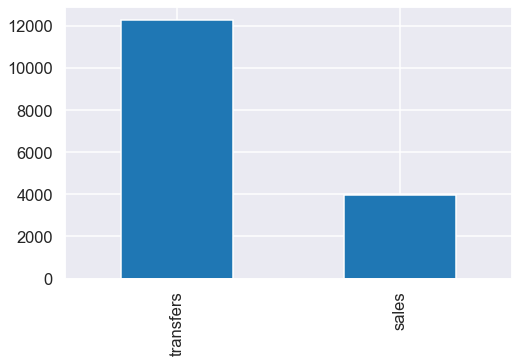

<IPython.core.display.Javascript object>

In [31]:
# Plot value_counts of transfers and sales
plt.figure(figsize=(8, 5))

df["type"].value_counts().plot.bar()

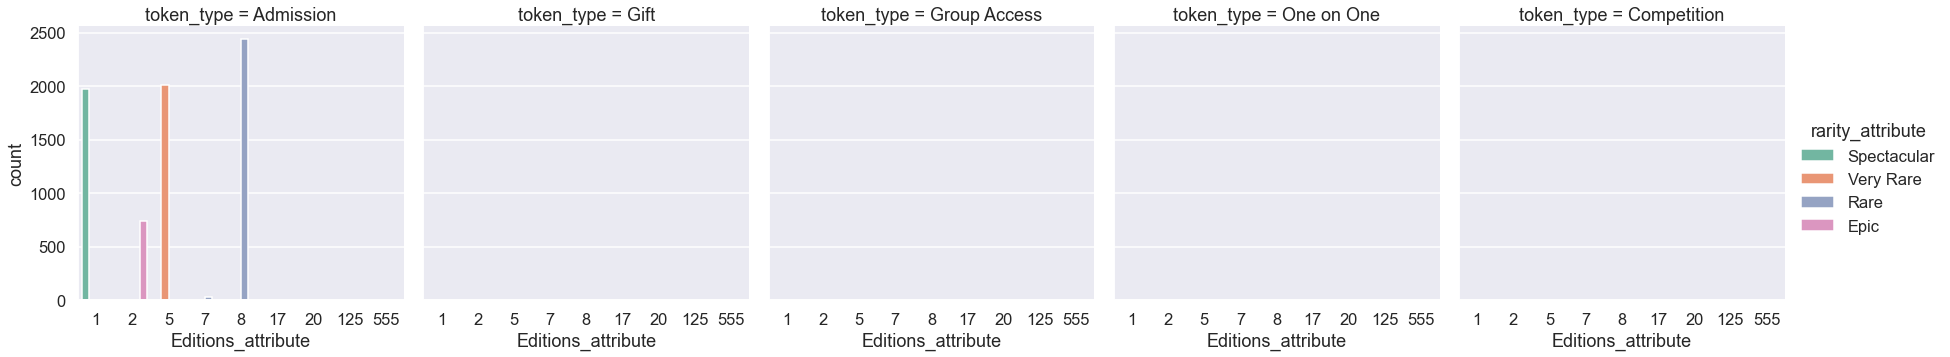

<IPython.core.display.Javascript object>

In [32]:
# Plot a graph comparing token type, editions, and rarity

sns.catplot(
    data=newdf,
    x="Editions_attribute",
    col="token_type",
    hue="rarity_attribute",
    palette="Set2",
    kind="count",
)

Text(0.5, 1.0, 'Histogram of Sales and Transfers over Time')

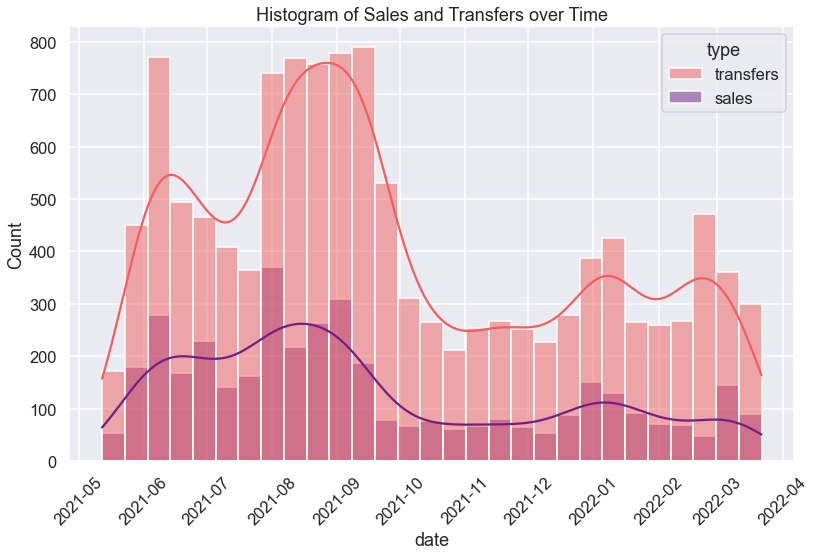

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(13, 8))
sns.histplot(data=df, x="date", palette="magma_r", hue="type", kde=True)
plt.xticks(rotation=45)
plt.title("Histogram of Sales and Transfers over Time")

## Observations:
- Both sales and transfers appear to follow a similar trend

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Creature'),
  Text(3, 0, 'Human'),
  Text(4, 0, 'Reptile'),
  Text(5, 0, 'Just Art'),
  Text(6, 0, 'Fish'),
  Text(7, 0, 'Dinosaur'),
  Text(8, 0, 'Invertebrate'),
  Text(9, 0, 'Amphibian')])

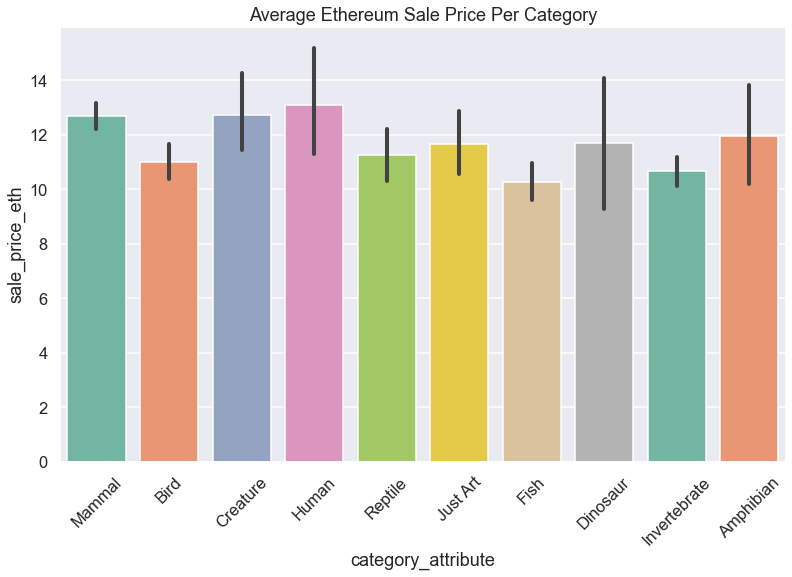

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(13, 8))
sns.barplot(data=df, x="category_attribute", y="sale_price_eth", palette="Set2")
plt.title("Average Ethereum Sale Price Per Category")
plt.xticks(rotation=45)

## Observations:
- The average sale price doesn't seem affected by category

Text(0.5, 1.0, 'Average Ethereum Sale Price Per Rarity')

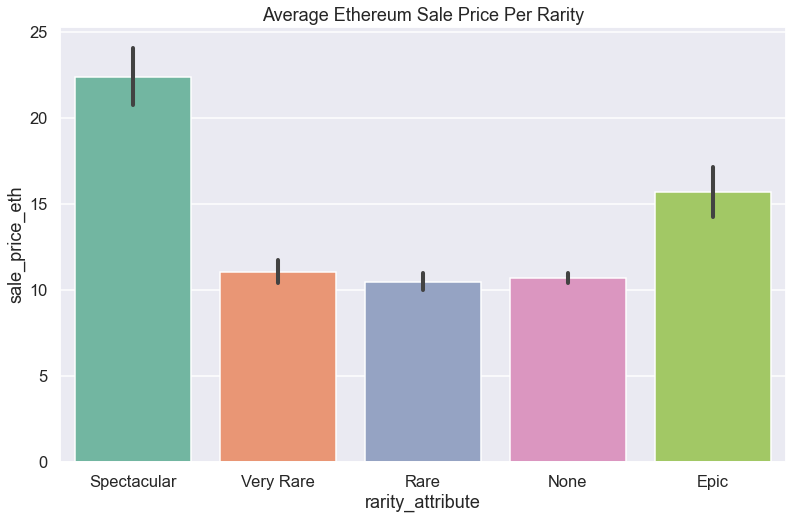

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(13, 8))
sns.barplot(data=df, x="rarity_attribute", y="sale_price_eth", palette="Set2")
plt.title("Average Ethereum Sale Price Per Rarity")

## Observations:
- There is a clear difference here!
- NFTs marked as Spectacular have the higest sale price!
- Next highest is Epic

Text(0.5, 1.0, 'Ethereum Sale Price Per Rarity')

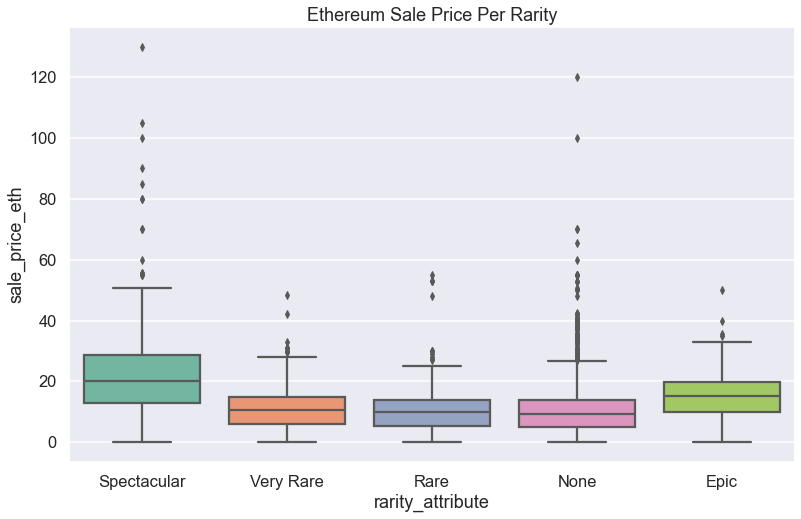

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, x="rarity_attribute", y="sale_price_eth", palette="Set2")
plt.title("Ethereum Sale Price Per Rarity")

## Observations:
- This boxplot shows us that there are some highly priced outliers in the None rarity attribute as well

Text(0.5, 1.0, 'Ethereum Sale Price Per Editions')

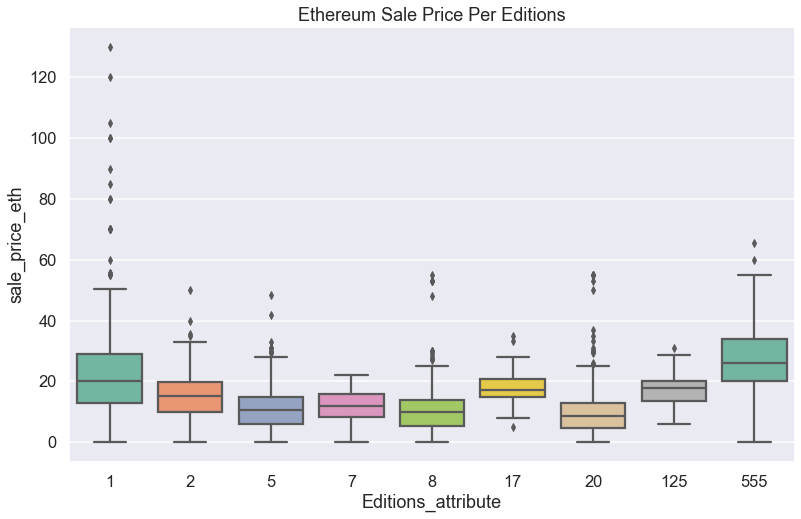

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, x="Editions_attribute", y="sale_price_eth", palette="Set2")
plt.title("Ethereum Sale Price Per Editions")

Text(0.5, 1.0, 'Ethereum Sale Price Per Token Type')

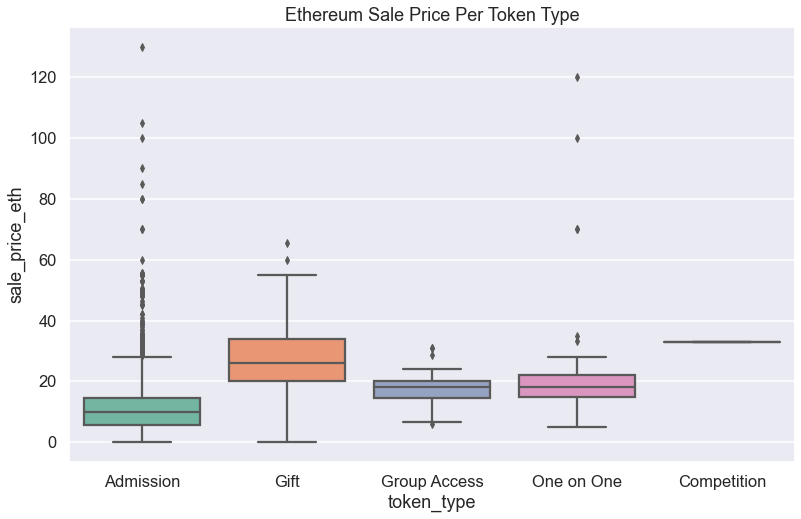

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(13, 8))
sns.boxplot(
    data=newdf, x="token_type", y="sale_price_eth", palette="Set2",
)
plt.title("Ethereum Sale Price Per Token Type")

Text(0.5, 1.0, 'Average Ethereum Sale Price Per Token Type')

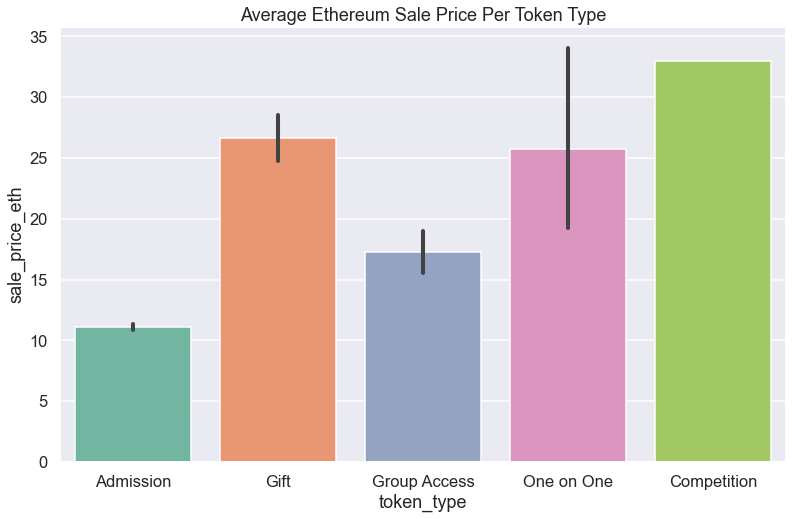

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(13, 8))
sns.barplot(
    data=newdf, x="token_type", y="sale_price_eth", palette="Set2",
)
plt.title("Average Ethereum Sale Price Per Token Type")

# Observations:
- NFTs in the Admissions category sell for the least

Text(0.5, 1.0, 'Histogram of Sales and Transfers per Token Type')

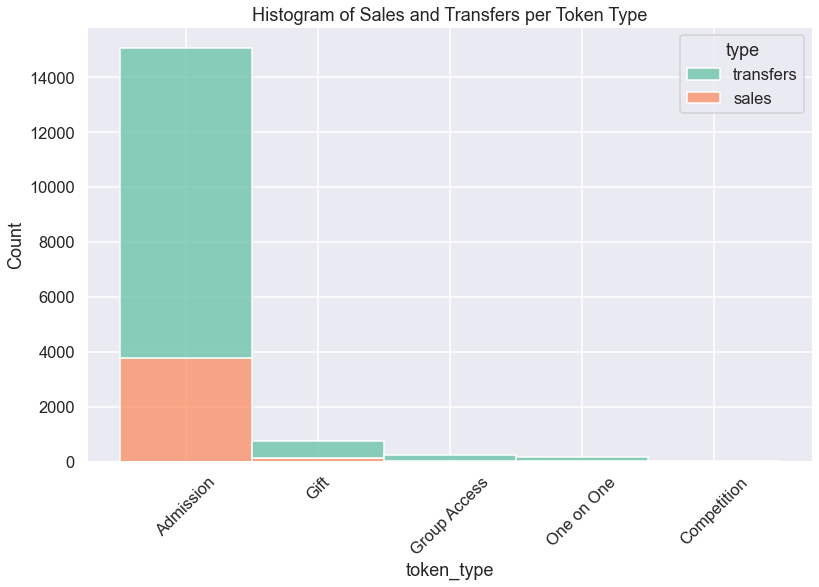

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(13, 8))
sns.histplot(data=newdf, x="token_type", palette="Set2", hue="type", multiple="stack")
plt.xticks(rotation=45)
plt.title("Histogram of Sales and Transfers per Token Type")

## Observations:
- Most NFT sales and transfers occur in the Admission category (which happens to have the lowest prices!)

In [41]:
# function to plot stacked bar chart and compare composition of sectors inside each cluster (Next Step)


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #     print(tab1)
    #     print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(
        kind="bar",
        stacked=True,
        figsize=(count + 5, 6),
        color=sns.color_palette("Paired"),
    )
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)

    plt.show()

<IPython.core.display.Javascript object>

Percentage of sales vs transfers for transactions in each token type


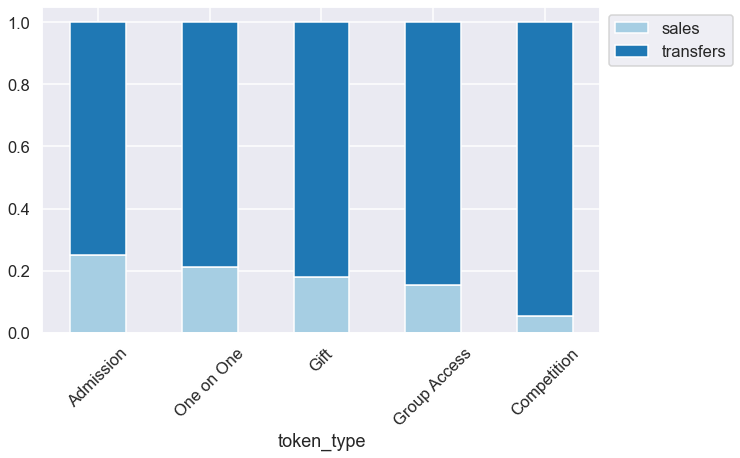

<IPython.core.display.Javascript object>

In [42]:
print("Percentage of sales vs transfers for transactions in each token type")
stacked_barplot(newdf, "token_type", "type")


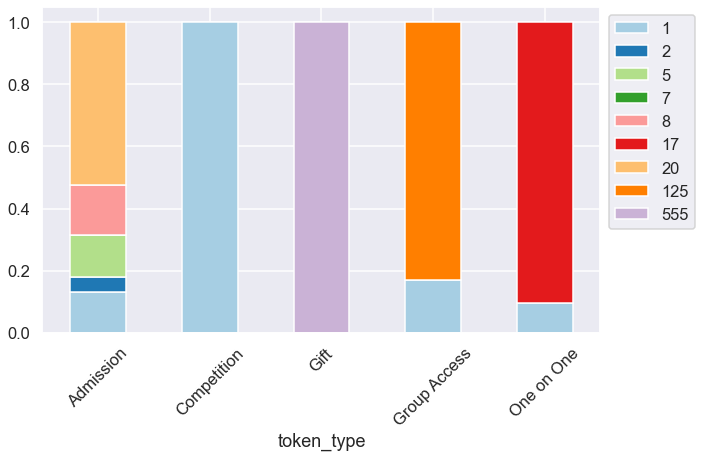

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(newdf, "token_type", "Editions_attribute")

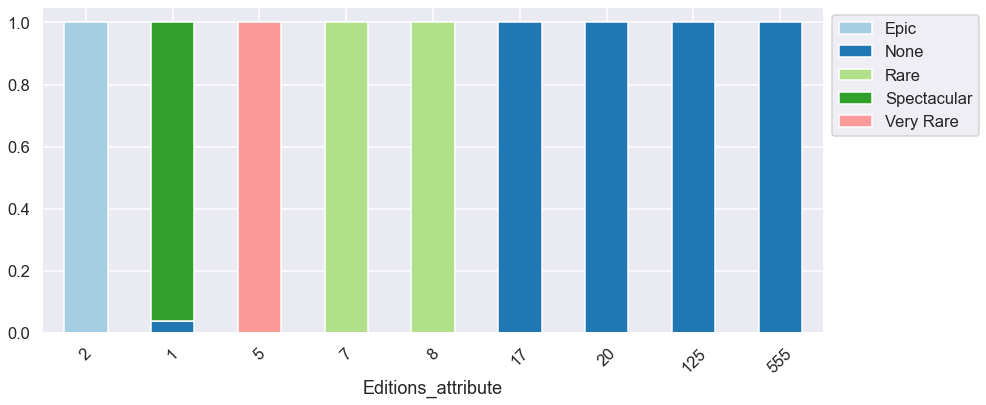

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df, "Editions_attribute", "rarity_attribute")

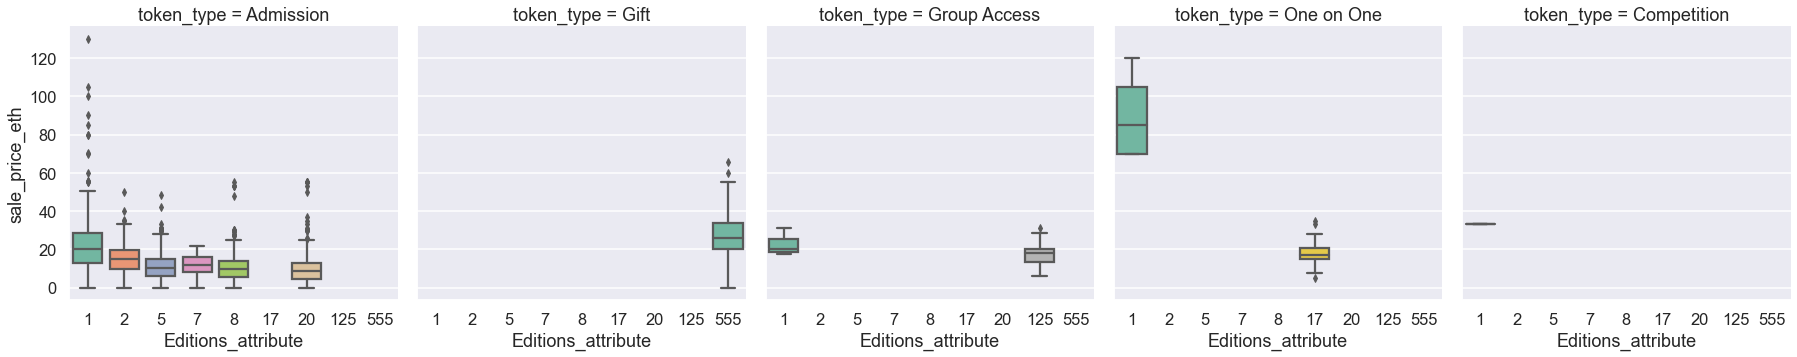

<IPython.core.display.Javascript object>

In [45]:
sns.catplot(
    data=newdf,
    x="Editions_attribute",
    col="token_type",
    y="sale_price_eth",
    palette="Set2",
    kind="box",
)

Text(0.5, 1.0, 'Comparison of sale prices in Ethereum and US Dollars')

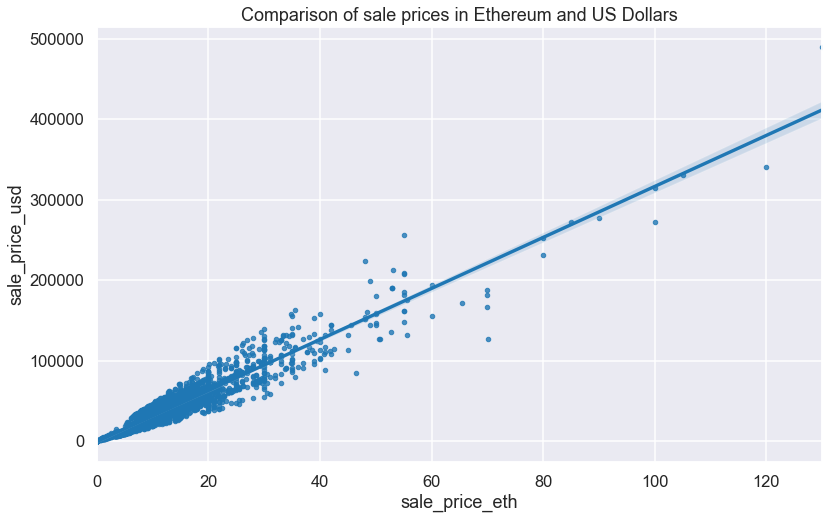

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(13, 8))
sns.regplot(data=df, y="sale_price_usd", x="sale_price_eth", marker=".")
plt.title("Comparison of sale prices in Ethereum and US Dollars")

Text(0.5, 1.0, 'Timeline of NFT sales in Ethereum including rarity score and categories')

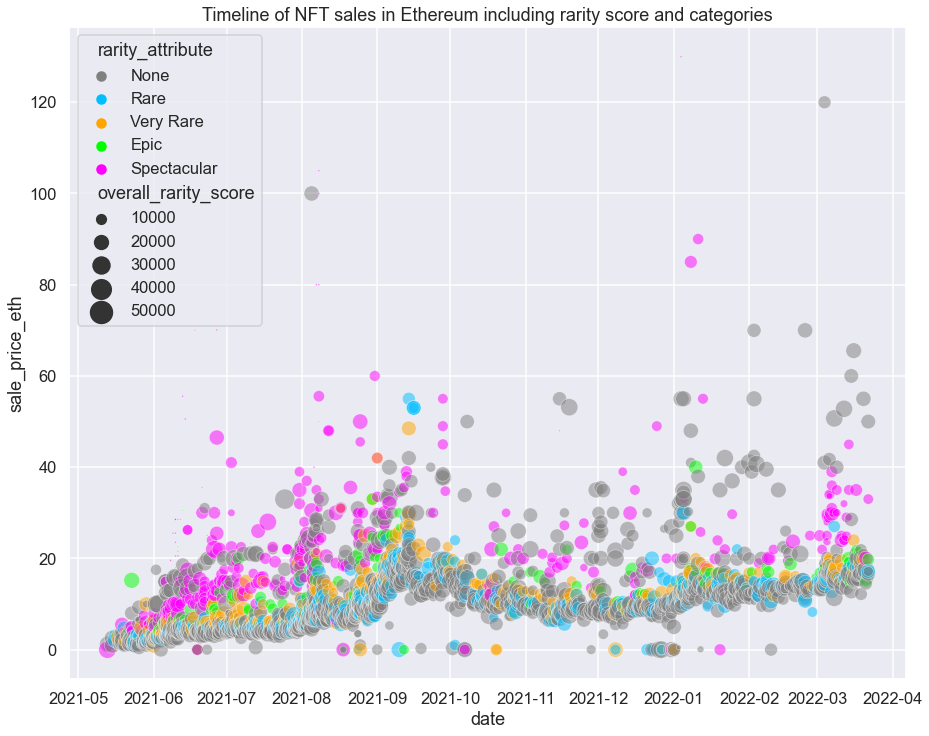

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(15, 12))

sns.scatterplot(
    data=df,
    x="date",
    y="sale_price_eth",
    palette=["grey", "deepskyblue", "orange", "lime", "fuchsia"],
    alpha=0.5,
    legend="brief",
    size="overall_rarity_score",
    hue="rarity_attribute",
    hue_order=["None", "Rare", "Very Rare", "Epic", "Spectacular"],
    sizes=(1, 500),
)
plt.title("Timeline of NFT sales in Ethereum including rarity score and categories")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Text(0.5, 1.0, 'Timeline of NFT sales in Ethereum by Token Type')

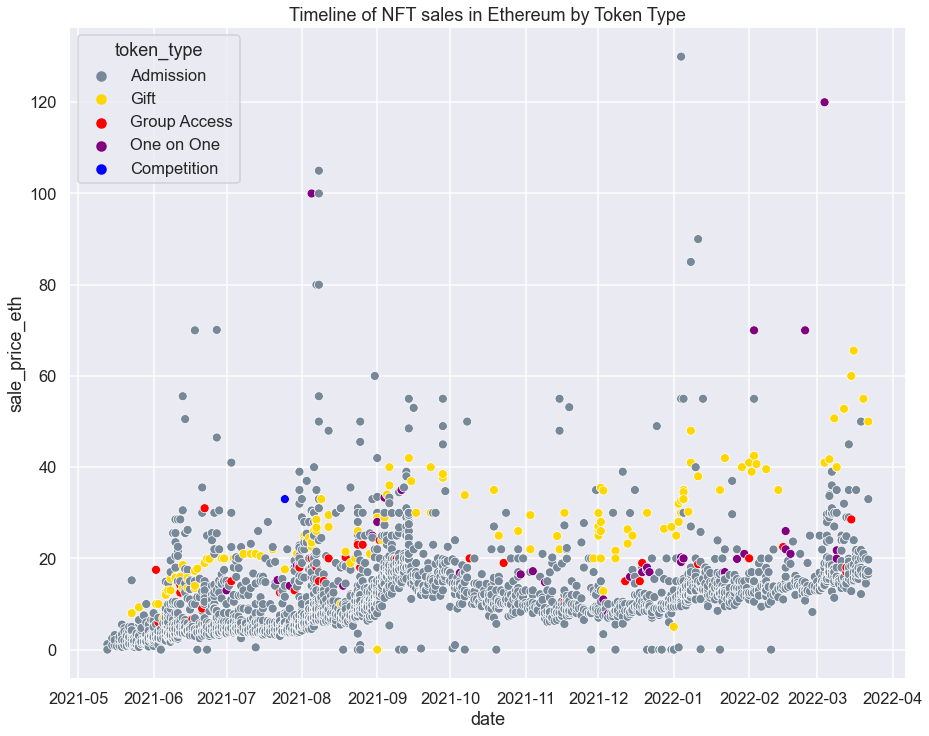

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(15, 12))

sns.scatterplot(
    data=newdf,
    x="date",
    y="sale_price_eth",
    palette=["lightslategray", "gold", "red", "purple", "blue"],
    legend="brief",
    hue="token_type",
)
plt.title("Timeline of NFT sales in Ethereum by Token Type")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Text(0.5, 1.0, 'Timeline of NFT sales in Ethereum including rarity score and categories')

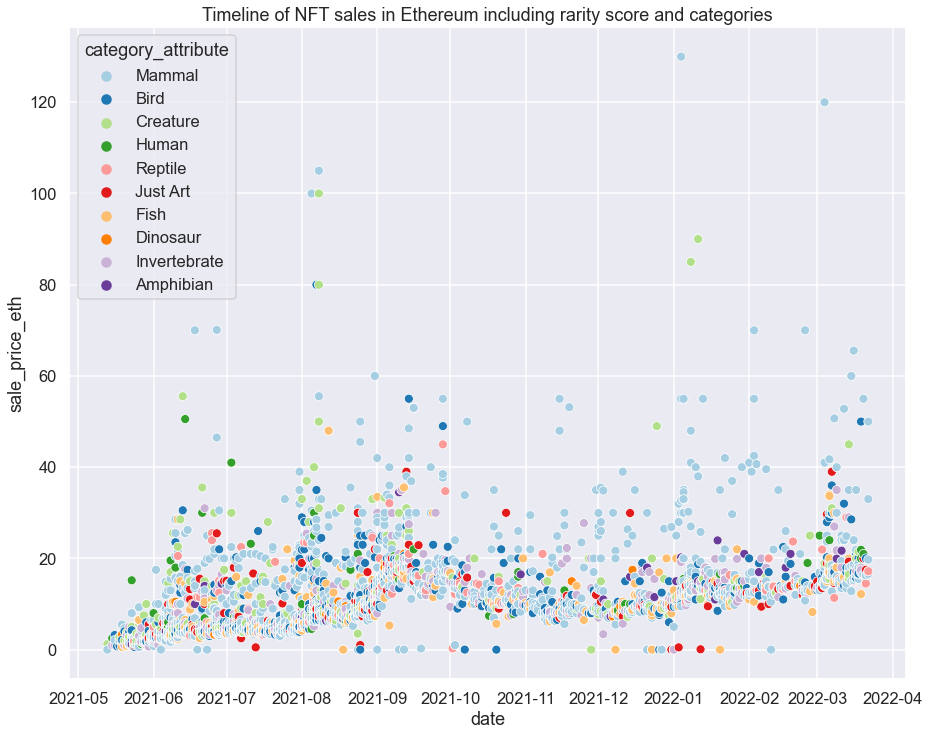

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(15, 12))

sns.scatterplot(
    data=newdf,
    x="date",
    y="sale_price_eth",
    palette="Paired",
    legend="brief",
    hue="category_attribute",
)
plt.title("Timeline of NFT sales in Ethereum including rarity score and categories")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Price of Ethereum in USD from Apr 2021 to Apr 2022
(Screenshots from https://ycharts.com/indicators/ethereum_price)
### Lowest Price in 1 Year (July 21, 2021)
![](eth_price_1year.png)
### Highest Price in 1 Year (Nov 9, 2021)
![](eth_price_1year_high.png)
### Lowest Price in last 6 months (Jan 23, 2022)
![](eth_price_1year_low.png)
# Google Searches for "NFT" from Apr 2021 to Apr 2022
![](nft_trend_goog_1year.png)

# Notice how searches for "NFT" were rising at the same time the price of Ethereum was dropping in January 2022.

Text(0.5, 1.0, 'Avg price of all VeeFriends NFT sales in Ethereum over 1 year\nRed Lines correspond with local highs in Eth price\nGreen Lines correspond with local lows in Eth price')

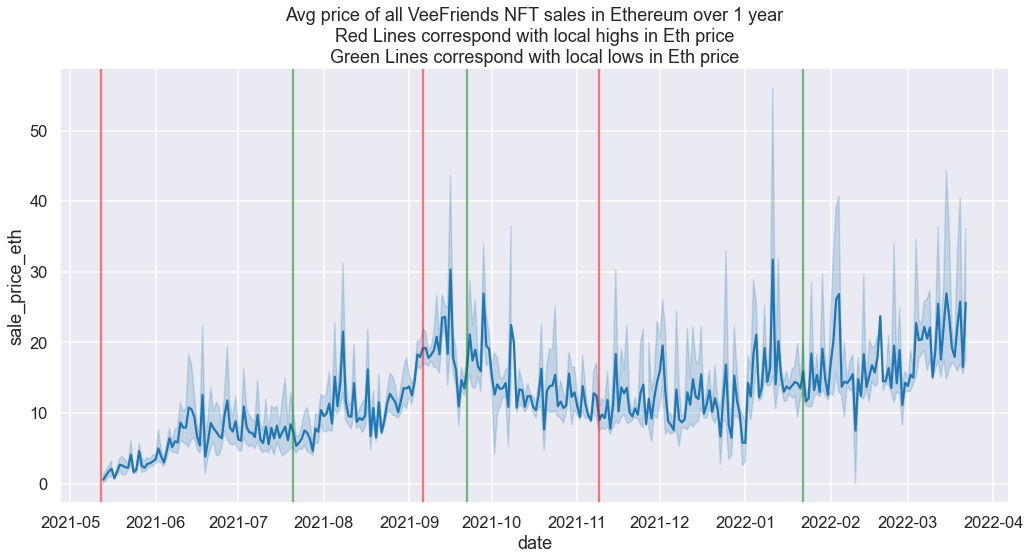

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(17, 8))
sns.lineplot(data=df, y="sale_price_eth", x="date")

plt.axvline(datetime.date(2022, 1, 22), color="green", alpha=0.5)
plt.axvline(datetime.date(2021, 11, 9), color="red", alpha=0.5)
plt.axvline(datetime.date(2021, 7, 21), color="green", alpha=0.5)
plt.axvline(datetime.date(2021, 9, 22), color="green", alpha=0.5)
plt.axvline(datetime.date(2021, 9, 6), color="red", alpha=0.5)
plt.axvline(datetime.date(2021, 5, 12), color="red", alpha=0.5)

plt.title(
    "Avg price of all VeeFriends NFT sales in Ethereum over 1 year\nRed Lines correspond with local highs in Eth price\nGreen Lines correspond with local lows in Eth price"
)

In [51]:
# What was the most expensive NFT sale?

print(str(df["sale_price_eth"].max()) + " Ethereum")
print(str(df["sale_price_usd"].max()) + " US Dollars")

130.0 Ethereum
490022.0 US Dollars


<IPython.core.display.Javascript object>

In [52]:
# What is the total amount of currency transacted in this dataset?

print(str(df["sale_price_eth"].sum()) + " Ethereum")
print(str(df["sale_price_usd"].sum()) + " US Dollars")

47306.9323554686 Ethereum
147577636.98371938 US Dollars


<IPython.core.display.Javascript object>

In [53]:
# How many transactions are there for each NFT?
df["asset_id"].value_counts().head(10)

7836    21
8566    20
7301    20
2561    20
526     20
1132    19
5837    19
2147    19
8786    19
647     18
Name: asset_id, dtype: int64

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Sale Prices of the Reliable Rat NFT that had the most sales and transfers combined')

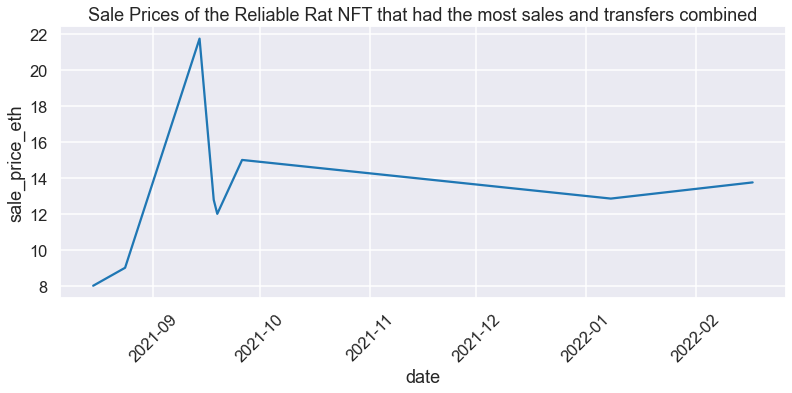

<IPython.core.display.Javascript object>

In [54]:
# What were the sale prices of the most moved NFT (Reliable Rat)?

plt.figure(figsize=(13, 5))
sns.lineplot(data=df.loc[df["asset_id"] == 7836], y="sale_price_eth", x="date")
plt.xticks(rotation=45)
plt.title(
    "Sale Prices of the Reliable Rat NFT that had the most sales and transfers combined"
)

Text(0.5, 1.0, 'How many transactions (sales and transfers) all the NFTs have')

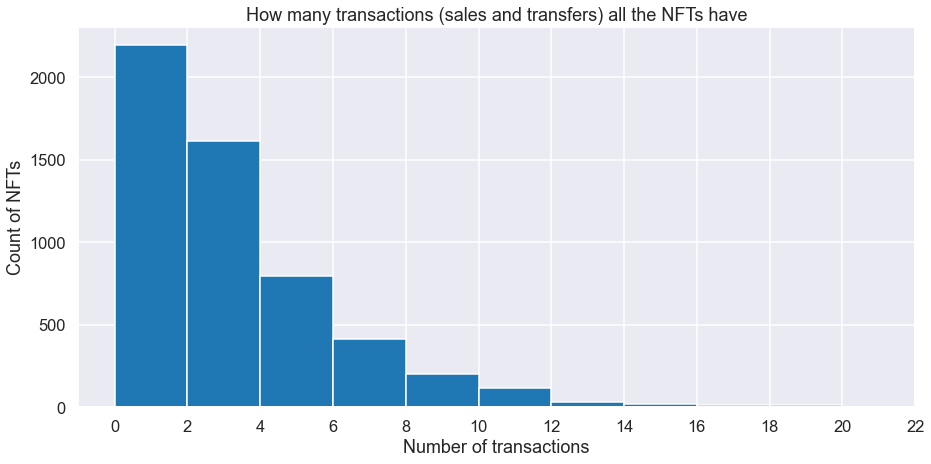

<IPython.core.display.Javascript object>

In [55]:

plt.figure(figsize=(15, 7))
bins = range(0,22,2)

df["asset_id"].value_counts().hist(bins=bins)

plt.xticks(np.arange(0, 23, 2))
plt.xlabel("Number of transactions")
plt.ylabel("Count of NFTs")
plt.title("How many transactions (sales and transfers) all the NFTs have")


## Observation
- Over 2000 NFTs have only 1 transaction
- 1500 NFTs have 2 or 3 total transactions
- Approx 750 NFTs have 4 or 5 transactions
- Under 500 have 6 or 7 transactions
- Very few NFTs have 10 or more total transactions

In [56]:
# How many sales transactions are there for each NFT (transfers excluded)?

# Make a subset of only sales rows
sales = df[df["type"] == "sales"].copy()

# Save the top 10 NFTs that had the most sales as a list
mostsales = sales["asset_id"].value_counts().head(10).index

# Show the top 10
sales["asset_id"].value_counts().head(10)

7012    8
7301    8
9772    8
7836    8
7835    7
8160    7
8440    7
7733    7
526     7
572     7
Name: asset_id, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
# How many sales transactions are there for each NFT (transfers and sales=$0 excluded)?
print(sales.shape[0])
print(sales.loc[sales["sale_price_eth"] != 0].shape[0])

3991
3973


<IPython.core.display.Javascript object>

## Observation:
Of the 3991 rows representing sales, 18 of those "sales" were for $0. We will assume the sales are real.

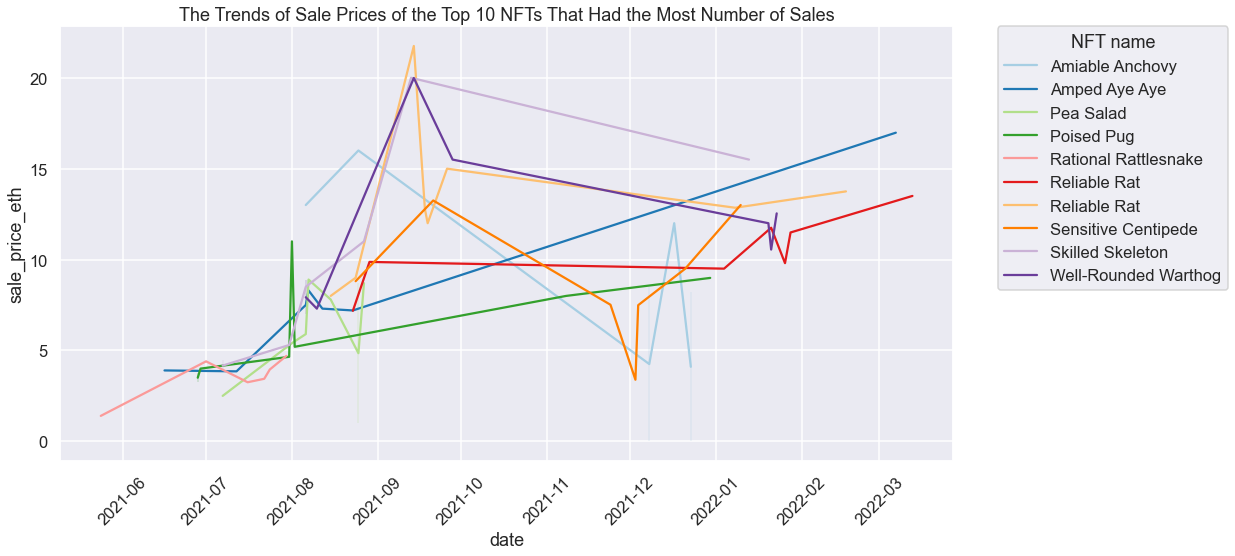

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df.loc[df["asset_id"].isin(mostsales)],
    y="sale_price_eth",
    x="date",
    hue="asset_id",
    palette="Paired",
)
plt.xticks(rotation=45)
plt.title("The Trends of Sale Prices of the Top 10 NFTs That Had the Most Number of Sales")
plt.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0,
    title="NFT name",
    labels=[id2name[i] for i in mostsales.sort_values()]
)


In [59]:
# How many NFTs sold for over a quarter million dollars at the time of sale?
qrtmil = (
    newdf.loc[df["sale_price_usd"] > 250000]
    .groupby("asset_id")[
        [
            "date",
            "sale_price_usd",
            "sale_price_eth",
            "name",
            "token_type",
            "rarity_attribute",
        ]
    ]
    .max()
    .sort_values(by="date", ascending=True)
    .reset_index()
)

print("NFTs that sold for over a quarter million dollars at the time of sale:")
qrtmil

NFTs that sold for over a quarter million dollars at the time of sale:


asset_id       date  sale_price_usd  sale_price_eth  \
0      2198 2021-08-05   272453.000000           100.0   
1       385 2021-08-08   315122.000000           100.0   
2       472 2021-08-08   330878.100000           105.0   
3      2962 2021-08-08   252097.600000            80.0   
4      6925 2021-11-15   255912.250000            55.0   
5      2823 2022-01-04   490022.000000           130.0   
6      9130 2022-01-08   272152.150000            85.0   
7      9133 2022-01-11   277805.700000            90.0   
8      7279 2022-03-04   340428.760392           120.0   

                              name  token_type rarity_attribute  
0                    Courtside Cat  One on One              NaN  
1                  Adaptable Alien   Admission      Spectacular  
2                        Alert Ape   Admission      Spectacular  
3                 Entrepreneur Elf   Admission      Spectacular  
4                    Patient Panda   Admission              NaN  
5                 Empathy Elephant   Admission      Spectacular  
6  Thoughtful Three Horned Haripik   Admission      Spectacular  
7  Thoughtful Three Horned Haripik   Admission      Spectacular  
8                  Podcast Panther  One on One              NaN

<IPython.core.display.Javascript object>

# Now to flatten the dataset by `asset_id` for further analysis

In order to make this dataset friendly for clustering, we need to group all the unique asset IDs and create new columns.
### New columns (Feature Engineering)
- number of transfers
- number of sales
- number of unique owners
- lowest sale price (eth)
- highest sale price (eth)
- sale range (eth)
- average sale price (eth)
- date of first transaction
- date of last sale

### Columns that stay the same
- rarity_attribute **One of these must be dropped**
- Editions_attribute **Because of collinearity**
- overall_rarity_score
- category_attribute
- token_type

### Columns to be dropped before clustering
- asset_id
- url
- animal_attribute
- adjective_attribute
- name
- date
- from_address
- to_address
- transaction_hash
- type
- sale_price_eth
- sale_price_usd

In [60]:
# make a copy for feature engineering
fdf = df.copy()

# Add the token_type column and drop benefit and group
fdf["token_type"] = newdf["token_type"].copy()
fdf.drop(
    ["benefit_attribute", "group_attribute"], axis=1, inplace=True,
)

# sort the dataset by id
fdf.sort_values("asset_id", inplace=True)

# Caluculate / aggregate / summarize new features
data1 = (
    fdf.groupby("asset_id")
    .agg(
        avg_sale=("sale_price_eth", "mean"),
        min_sale=("sale_price_eth", "min"),
        max_sale=("sale_price_eth", "max"),
        first_transaction=("date", "min"),
        last_transaction=("date", "max"),
    )
    .reset_index()
)

# use groupby and pivot to create new features
data2 = (
    fdf[["asset_id", "type"]]
    .groupby(["asset_id", "type"])["type"]
    .agg("count")
    .to_frame("count")
    .reset_index()
)
data2 = data2.pivot(index="asset_id", columns="type").fillna(0).reset_index()
data2.columns = ["asset_id", "sales_count", "transfers_count"]

# "Stack" the to_address and from_address into one column of all owners
data3 = (
    fdf[["asset_id", "to_address", "from_address"]]
    .melt("asset_id", value_name="unique_owners")
    .drop("variable", 1)
)
# Now groupby asset_id and count the number of unique owners per NFT
data4 = data3.groupby("asset_id")["unique_owners"].nunique().to_frame().reset_index()

# Now create
data5 = fdf.groupby("asset_id").first().reset_index()
data5.drop(
    [
        "url",
        "animal_attribute",
        "adjective_attribute",
        "sale_price_usd",
        "sale_price_eth",
        "type",
        "transaction_hash",
        "from_address",
        "to_address",
        "date",
    ],
    axis=1,
    inplace=True,
)

# Now merge them all together
data = (
    data5.merge(data1, on="asset_id")
    .merge(data2, on="asset_id")
    .merge(data4, on="asset_id")
)
# add price range and day range
data["sale_range"] = data["max_sale"] - data["min_sale"]
data["day_range"] = (data["last_transaction"] - data["first_transaction"]).dt.days

data.head()

asset_id            name rarity_attribute  Editions_attribute  \
0         0  Content Condor      Spectacular                   1   
1         8  Content Condor             None                  20   
2         9  Content Condor             None                  20   
3        14  Content Condor             None                  20   
4        16  Content Condor             None                  20   

   overall_rarity_score category_attribute token_type  avg_sale  min_sale  \
0          26237.721665               Bird  Admission       NaN       NaN   
1          26177.322035               Bird  Admission      4.99      4.99   
2          31311.016988               Bird  Admission     18.40     18.40   
3           8247.937006               Bird  Admission      2.00      2.00   
4          31342.564087               Bird  Admission       NaN       NaN   

   max_sale first_transaction last_transaction  sales_count  transfers_count  \
0       NaN        2021-08-07       2022-01-03          0.0              7.0   
1      4.99        2021-07-04       2022-01-16          1.0              2.0   
2     18.40        2021-08-20       2021-12-19          1.0              4.0   
3      2.00        2021-05-27       2021-05-27          1.0              1.0   
4       NaN        2021-10-20       2021-10-20          0.0              1.0   

   unique_owners  sale_range  day_range  
0              6         NaN        149  
1              3         0.0        196  
2              5         0.0        121  
3              2         0.0          0  
4              2         NaN          0

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amphibian'),
  Text(1, 0, 'Invertebrate'),
  Text(2, 0, 'Fish'),
  Text(3, 0, 'Just Art'),
  Text(4, 0, 'Reptile'),
  Text(5, 0, 'Creature'),
  Text(6, 0, 'Bird'),
  Text(7, 0, 'Mammal'),
  Text(8, 0, 'Human'),
  Text(9, 0, 'Dinosaur')])

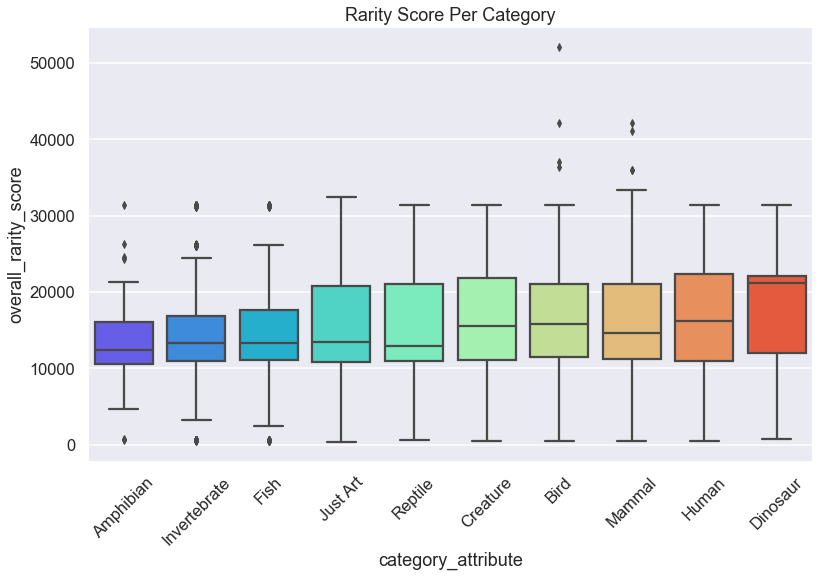

<IPython.core.display.Javascript object>

In [61]:
# THIS NEEDS TO BE ON A DATASET FLATTENED BY ASSED_ID

plt.figure(figsize=(13, 8))
sns.boxplot(
    data=data,
    x="category_attribute",
    y="overall_rarity_score",
    palette="rainbow",
    order=data.groupby("category_attribute")["overall_rarity_score"]
    .mean()
    .sort_values()
    .index,
)
plt.title("Rarity Score Per Category")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Admission'),
  Text(1, 0, 'One on One'),
  Text(2, 0, 'Group Access'),
  Text(3, 0, 'Gift'),
  Text(4, 0, 'Competition')])

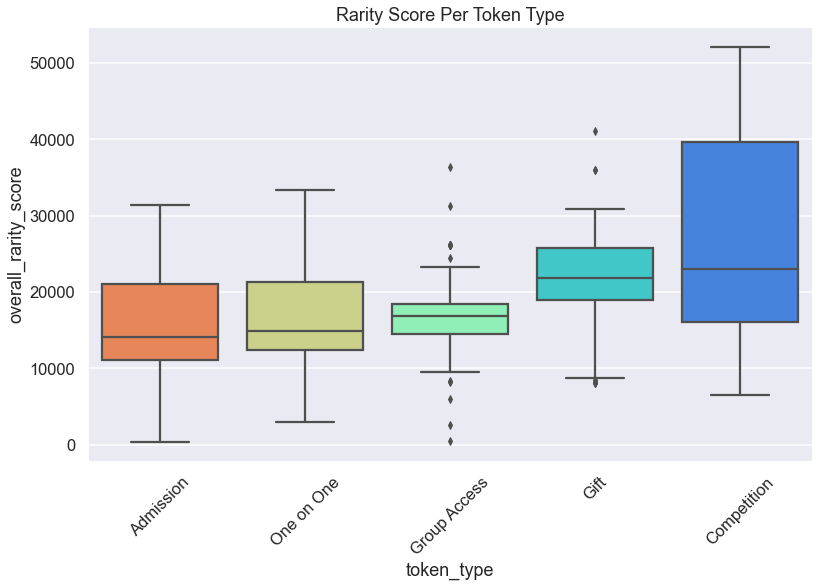

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(13, 8))
sns.boxplot(
    data=data,
    x="token_type",
    y="overall_rarity_score",
    palette="rainbow_r",
    order=data5.groupby("token_type")["overall_rarity_score"]
    .mean()
    .sort_values()
    .index,
)
plt.title("Rarity Score Per Token Type")
plt.xticks(rotation=45)

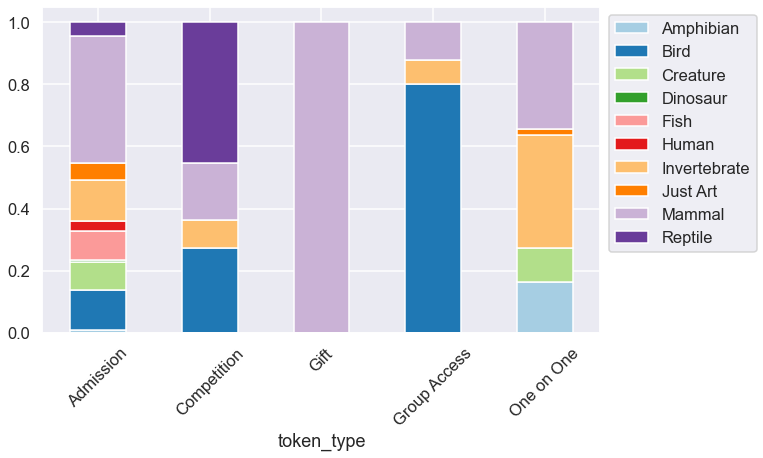

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(data=data, target="category_attribute", predictor="token_type")

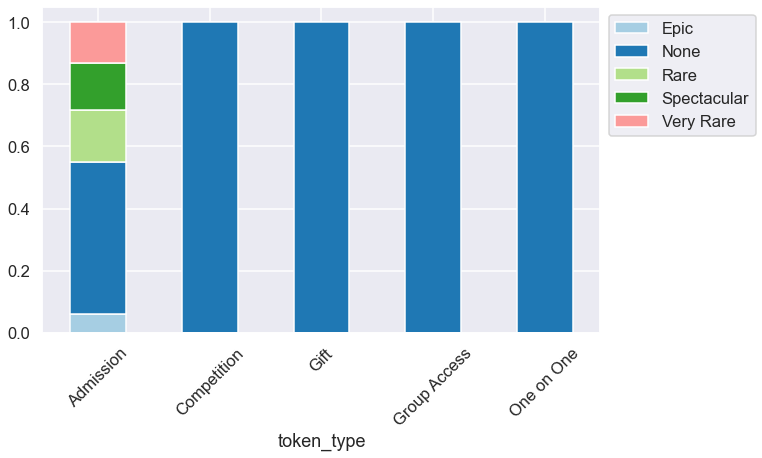

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(data, "token_type", "rarity_attribute")

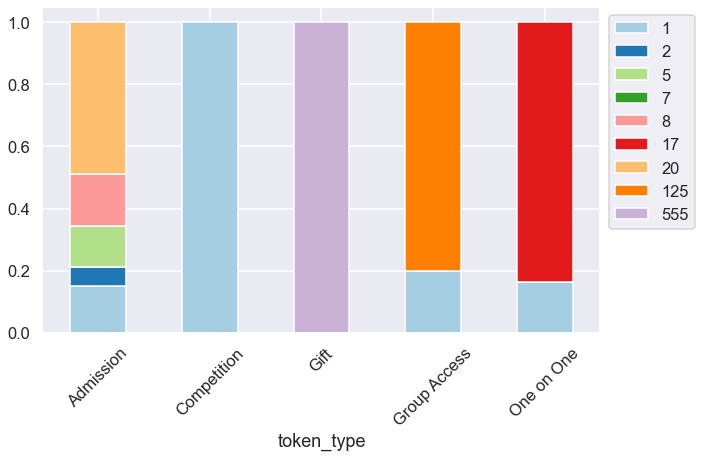

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(data, "token_type", "Editions_attribute")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Admission'),
  Text(1, 0, 'Competition'),
  Text(2, 0, 'Group Access'),
  Text(3, 0, 'One on One'),
  Text(4, 0, 'Gift')])

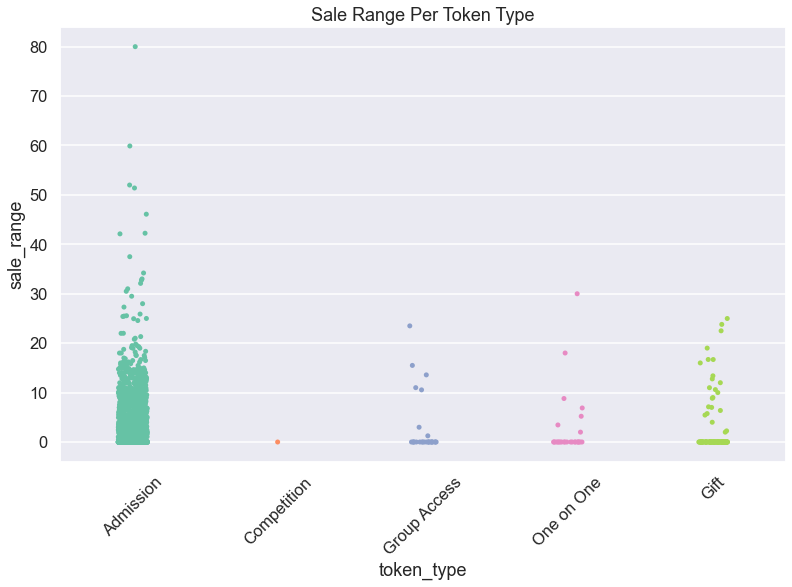

<IPython.core.display.Javascript object>

In [66]:
# Which token type has the widest sale range?

plt.figure(figsize=(13, 8))
sns.stripplot(
    data=data, x="token_type", y="sale_range", palette="Set2",
)
plt.title("Sale Range Per Token Type")
plt.xticks(rotation=45)

In [67]:
# Which NFT has the biggest range in sale prices?
data.loc[data["sale_range"] == data["sale_range"].max()]

asset_id                             name rarity_attribute  \
4797      9130  Thoughtful Three Horned Haripik      Spectacular   

      Editions_attribute  overall_rarity_score category_attribute token_type  \
4797                   1          16919.973716           Creature  Admission   

      avg_sale  min_sale  max_sale first_transaction last_transaction  \
4797      45.0       5.0      85.0        2021-05-23       2022-02-22   

      sales_count  transfers_count  unique_owners  sale_range  day_range  
4797          2.0              4.0              5        80.0        275

<IPython.core.display.Javascript object>

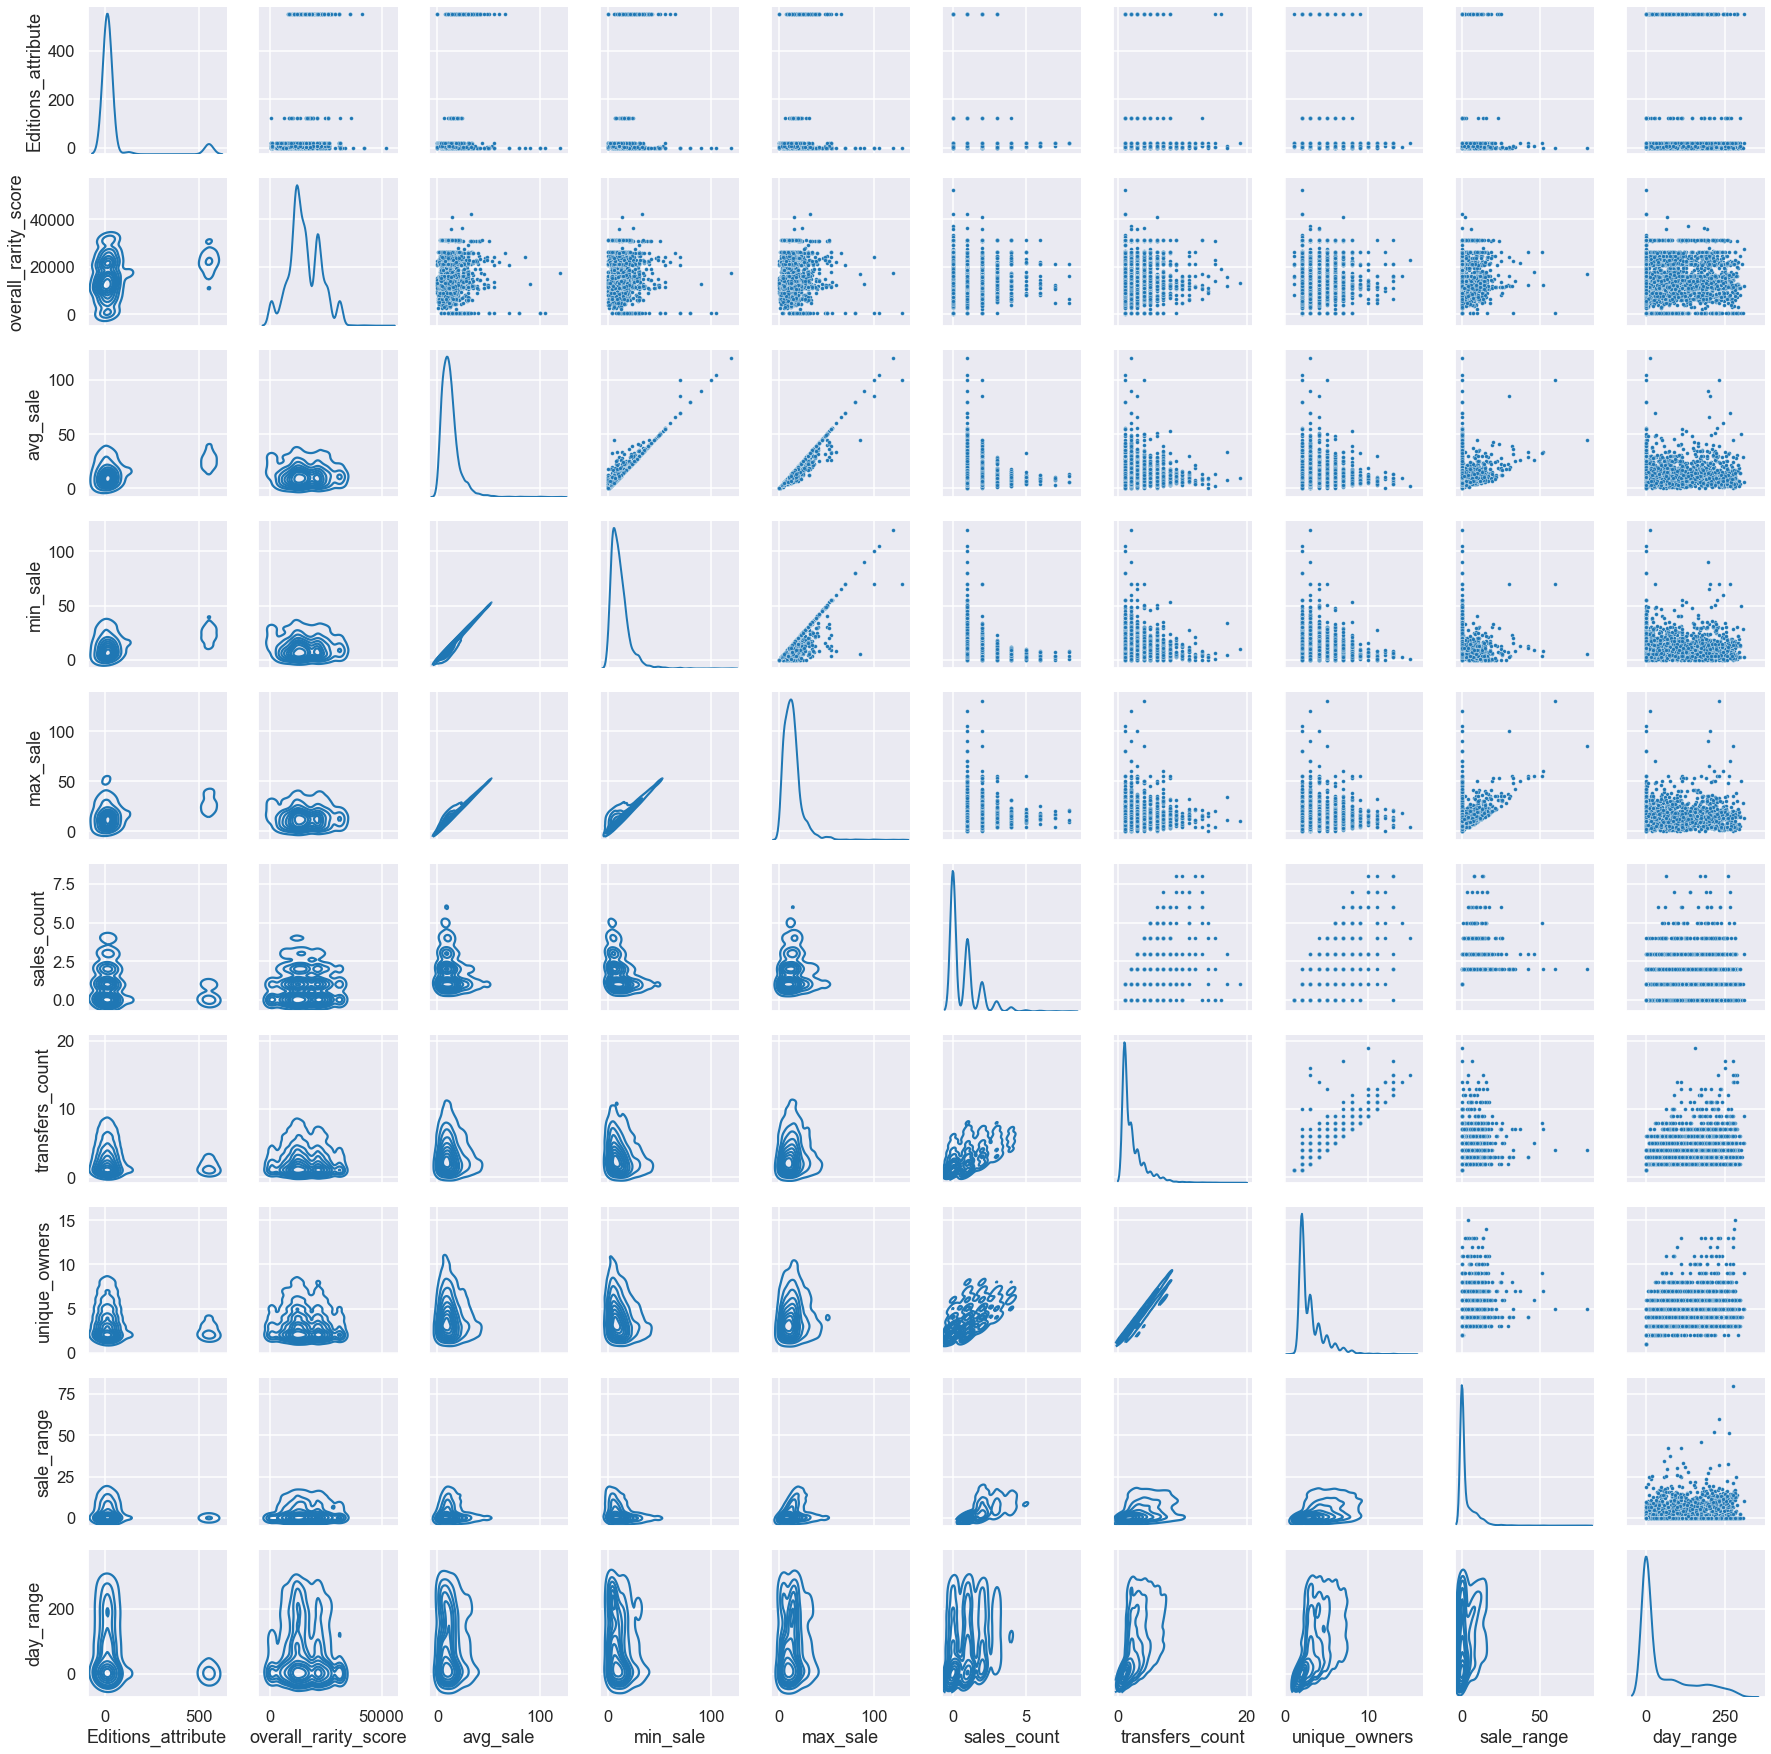

<IPython.core.display.Javascript object>

In [68]:
# Let's look for more patterns

g = sns.PairGrid(data.drop("asset_id", axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Text(0.5, 1.0, 'Correlation Coefficients of Numerical Variables')

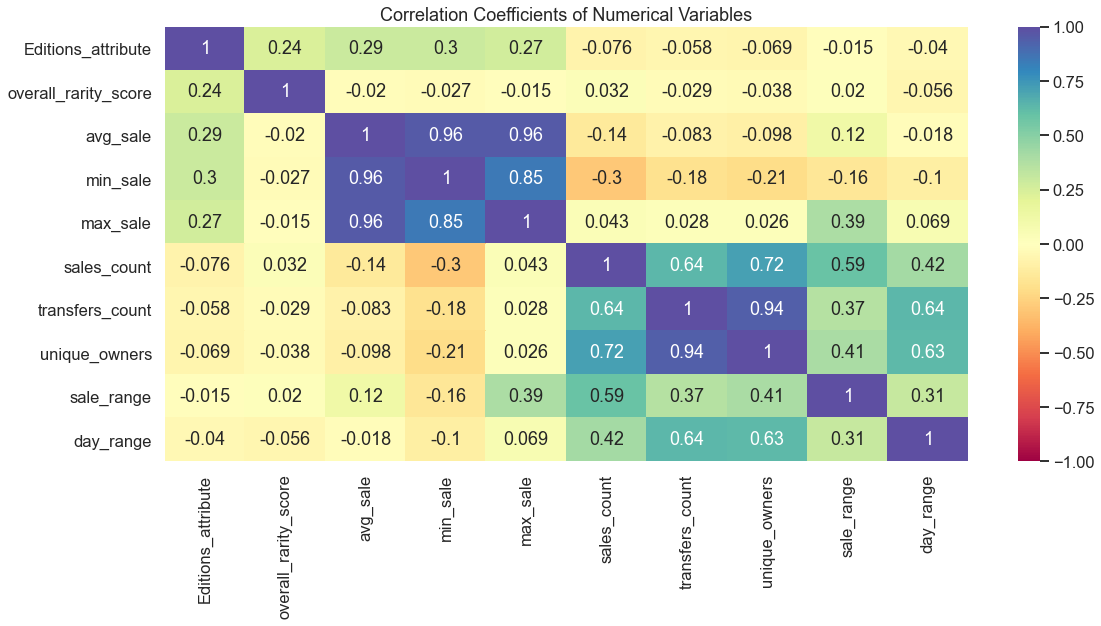

<IPython.core.display.Javascript object>

In [69]:
# What are the correlations of variables?

plt.figure(figsize=(18, 8))
sns.heatmap(
    data.drop("asset_id", axis=1).corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral",
)
plt.title("Correlation Coefficients of Numerical Variables")

## Observations:
- There are some high correlations between average, min, and max sales. There's also a high correlation between unique owners and transfer count.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5413 entries, 0 to 5412
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   asset_id              5413 non-null   int64         
 1   name                  5413 non-null   object        
 2   rarity_attribute      5413 non-null   object        
 3   Editions_attribute    5413 non-null   int32         
 4   overall_rarity_score  5413 non-null   float64       
 5   category_attribute    5413 non-null   object        
 6   token_type            5413 non-null   object        
 7   avg_sale              2472 non-null   float64       
 8   min_sale              2472 non-null   float64       
 9   max_sale              2472 non-null   float64       
 10  first_transaction     5413 non-null   datetime64[ns]
 11  last_transaction      5413 non-null   datetime64[ns]
 12  sales_count           5413 non-null   float64       
 13  transfers_count   

<IPython.core.display.Javascript object>

Let's drop the rows without sales data and look at our correlations again.

In [71]:
# Time to drop the rows with missing values so we only have NFTs with sales data

# This will be our "original" dataset that we will come back to after clustering
sdf = data.dropna()
sdf.shape

(2472, 17)

<IPython.core.display.Javascript object>

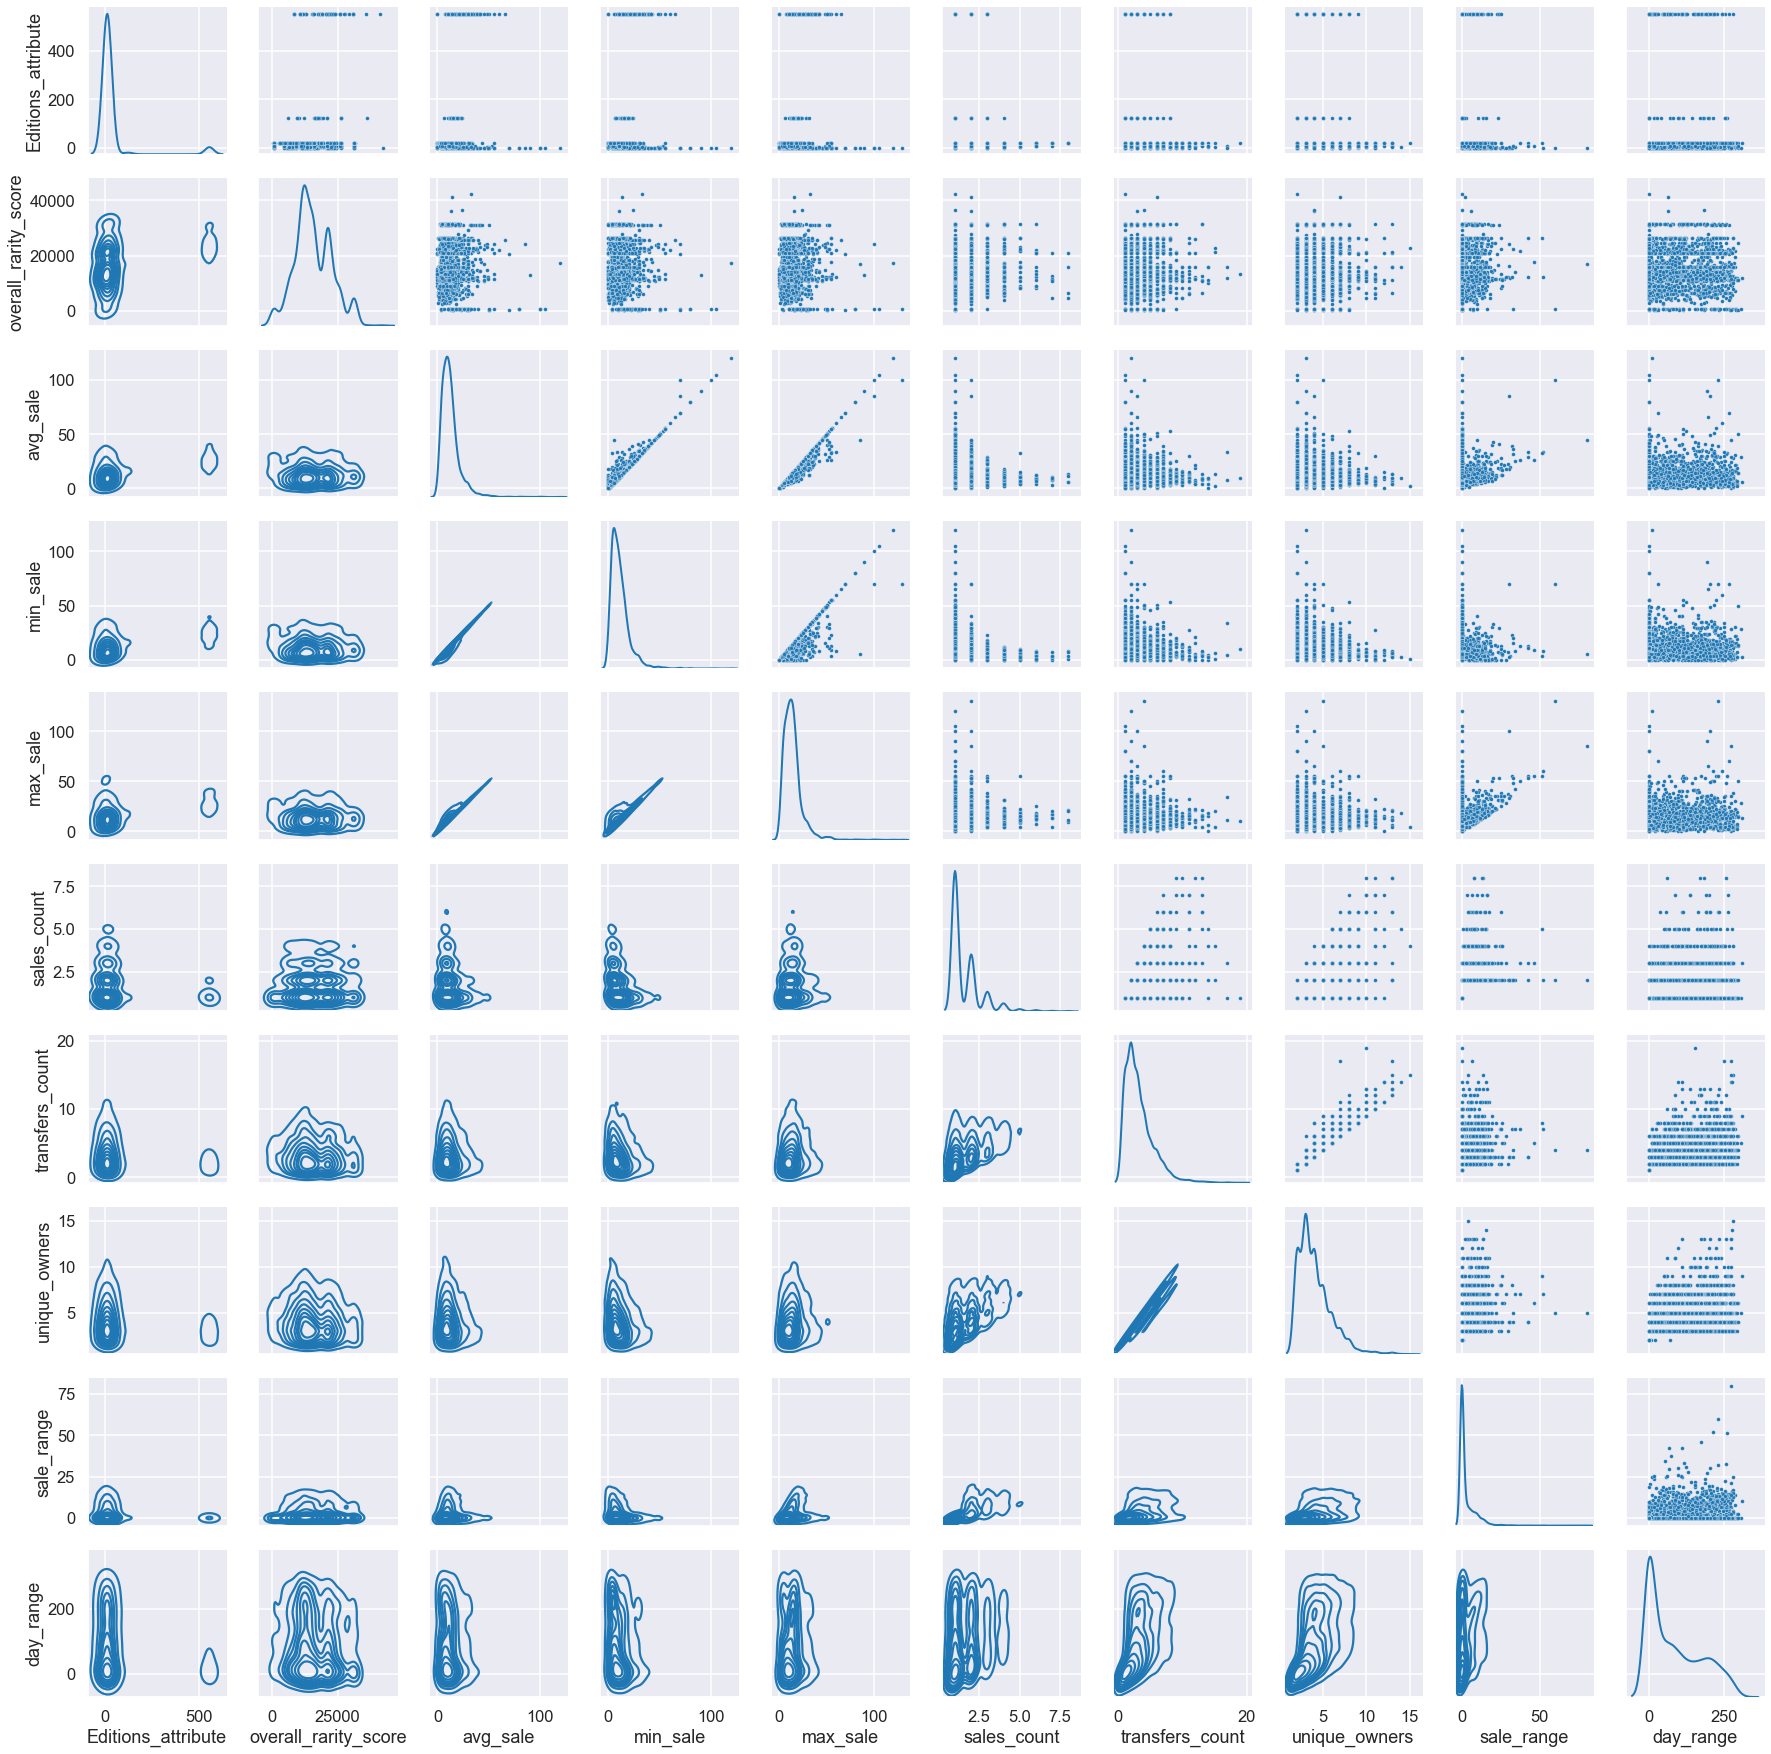

<IPython.core.display.Javascript object>

In [72]:
# Look at pairplot again with only NFTs that had sales

g = sns.PairGrid(sdf.drop("asset_id", axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Text(0.5, 1.0, 'Correlation Coefficients of Numerical Variables')

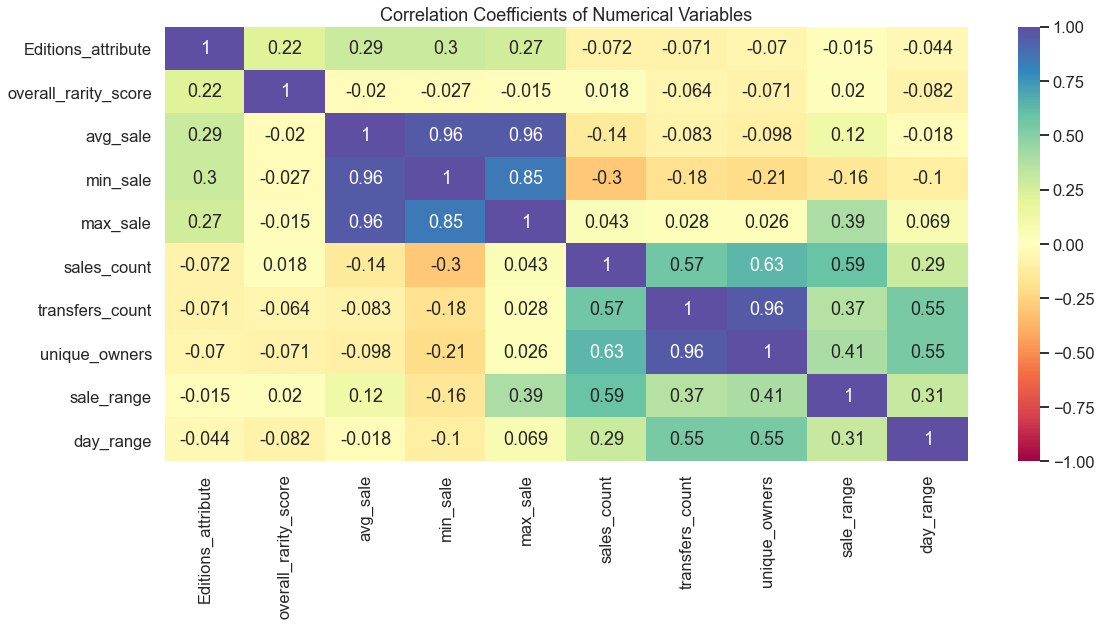

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(18, 8))
sns.heatmap(
    sdf.drop("asset_id", axis=1).corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral",
)
plt.title("Correlation Coefficients of Numerical Variables")

# Now for Clustering

# 2. Group the individual NFTs using K-means and Hierarchical Clustering


In [74]:
# Now let's import libraries

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

In [121]:
sdf = data.dropna()
sdf.columns

Index(['asset_id', 'name', 'rarity_attribute', 'Editions_attribute',
       'overall_rarity_score', 'category_attribute', 'token_type', 'avg_sale',
       'min_sale', 'max_sale', 'first_transaction', 'last_transaction',
       'sales_count', 'transfers_count', 'unique_owners', 'sale_range',
       'day_range'],
      dtype='object')

<IPython.core.display.Javascript object>

In [122]:
# Let's drop certain columns, get the dummy variables, scale the rest, and rename it.


prep = sdf.drop(
    [
        "asset_id",  # dropping asset_id, category, and name because not needed
        "name",
        "category_attribute",
        "first_transaction",  # dropping the rest because they are HIGHLY correlated
        "last_transaction",
        "max_sale",
        "min_sale",
        "transfers_count",
        "sales_count",
    ],
    axis=1,
)

# Turn category columns into one-hot-encoded columns and drop first row
prep = pd.get_dummies(prep, drop_first=True)


# Apply StandardScaler to transform numerical variables to their z-score
scaler = StandardScaler()
subset = prep.copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

# View top 5 rows of the new dataframe
subset_scaled_df.head()

Editions_attribute  overall_rarity_score  avg_sale  unique_owners  \
0           -0.163572              1.489742 -0.790804      -0.541813   
1           -0.163572              2.220728  0.589526       0.514883   
2           -0.163572             -1.063218 -1.098573      -1.070162   
3           -0.296532              0.761711 -0.686842      -0.013465   
4           -0.163572              1.495116 -0.861827      -0.541813   

   sale_range  day_range  rarity_attribute_None  rarity_attribute_Rare  \
0   -0.495821   1.240515               0.871453              -0.439375   
1   -0.495821   0.388060               0.871453              -0.439375   
2   -0.495821  -0.987233               0.871453              -0.439375   
3    1.642912   0.729042              -1.147509              -0.439375   
4   -0.495821   1.501934               0.871453              -0.439375   

   rarity_attribute_Spectacular  rarity_attribute_Very Rare  \
0                     -0.348708                   -0.365985   
1                     -0.348708                   -0.365985   
2                     -0.348708                   -0.365985   
3                     -0.348708                    2.732353   
4                     -0.348708                   -0.365985   

   token_type_Competition  token_type_Gift  token_type_Group Access  \
0               -0.020117        -0.216827                -0.105085   
1               -0.020117        -0.216827                -0.105085   
2               -0.020117        -0.216827                -0.105085   
3               -0.020117        -0.216827                -0.105085   
4               -0.020117        -0.216827                -0.105085   

   token_type_One on One  
0              -0.105085  
1              -0.105085  
2              -0.105085  
3              -0.105085  
4              -0.105085

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation Coefficients of Numerical Variables')

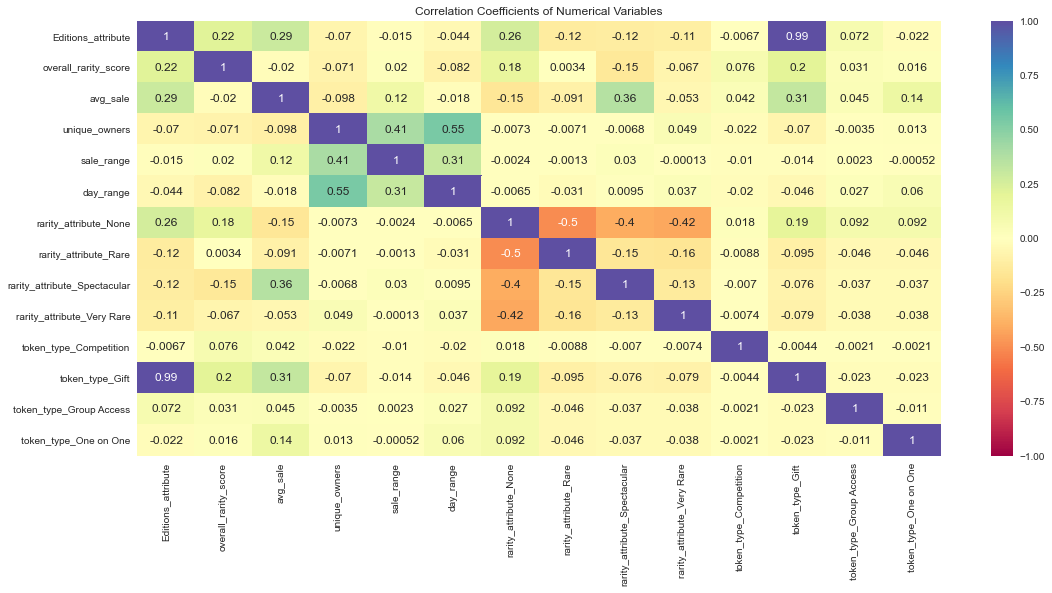

<IPython.core.display.Javascript object>

In [123]:
# Check the correlations now that we've removed highly correlated variables

plt.figure(figsize=(18, 8))
sns.heatmap(
    subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral",
)
plt.title("Correlation Coefficients of Numerical Variables")

There seems to be a high correlation between Gift and Editions, but we are going to leave them for now.

## K-means Clustering

First we will use the Elbow Method to find the optimal number of clusters (k)

Number of Clusters: 1 	Average Distortion: 3.2023708191420455
Number of Clusters: 2 	Average Distortion: 2.9541886014937715
Number of Clusters: 3 	Average Distortion: 2.6425245345121757
Number of Clusters: 4 	Average Distortion: 2.4325243178979528
Number of Clusters: 5 	Average Distortion: 2.1644845317182138
Number of Clusters: 6 	Average Distortion: 2.3018082591646407
Number of Clusters: 7 	Average Distortion: 2.0529460440294276
Number of Clusters: 8 	Average Distortion: 1.8782280564080187
Number of Clusters: 9 	Average Distortion: 1.785907272183946
Number of Clusters: 10 	Average Distortion: 1.7519190960627018
Number of Clusters: 11 	Average Distortion: 1.6644381476663777
Number of Clusters: 12 	Average Distortion: 1.607145263799585
Number of Clusters: 13 	Average Distortion: 1.5609530791885895
Number of Clusters: 14 	Average Distortion: 1.5267053864440787
Number of Clusters: 15 	Average Distortion: 1.5030614186664162
Number of Clusters: 16 	Average Distortion: 1.4691164259252862
Num

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

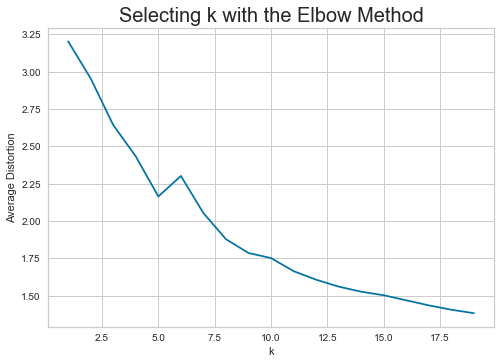

<IPython.core.display.Javascript object>

In [124]:
%%time

# Check for the average distortion for each value of k up to 10

clusters = range(1, 20)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

## Observation

The sharp elbows appear to be at k=5, k=7, k=8, and k=9 

## Let's look at another Elbow Graph

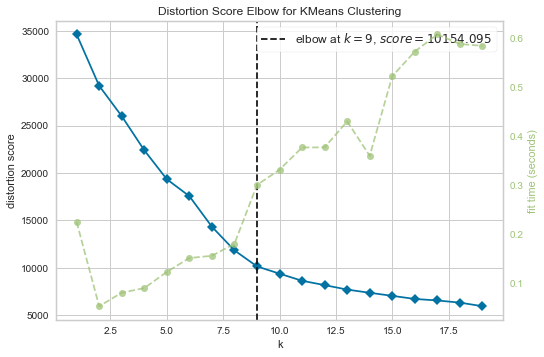

Wall time: 7.16 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [125]:
%%time

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 20), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### The plot says the elbow is at k=9, but 5 and 8 look good too

### Check the Silhouette Scores

For n_clusters = 2, silhouette score is 0.20490337262530864
For n_clusters = 3, silhouette score is 0.18939740751320064
For n_clusters = 4, silhouette score is 0.2904061137547486
For n_clusters = 5, silhouette score is 0.3611114266044759
For n_clusters = 6, silhouette score is 0.38855368722399325
For n_clusters = 7, silhouette score is 0.38367822226726056
For n_clusters = 8, silhouette score is 0.4033640006902078
For n_clusters = 9, silhouette score is 0.34810509296101566
For n_clusters = 10, silhouette score is 0.3543815539086085
For n_clusters = 11, silhouette score is 0.3216013939132479
For n_clusters = 12, silhouette score is 0.3187377999099685
For n_clusters = 13, silhouette score is 0.3140367531661927
For n_clusters = 14, silhouette score is 0.3148294348629586
For n_clusters = 15, silhouette score is 0.2939088516648506
For n_clusters = 16, silhouette score is 0.2963791898606583
For n_clusters = 17, silhouette score is 0.30389223455124104
For n_clusters = 18, silhouette score is 0

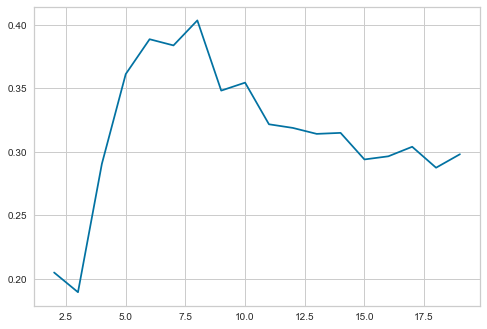

<IPython.core.display.Javascript object>

In [126]:
%%time

sil_score = []
cluster_list = list(range(2, 20))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

### Maybe k=8 is is the best? It has the highest score... let's try k=4,7,8,9

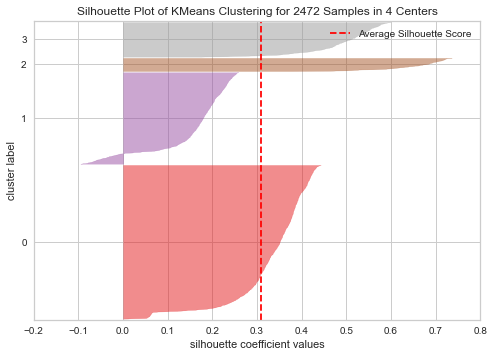

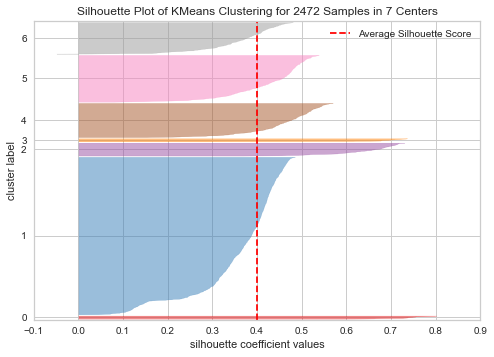

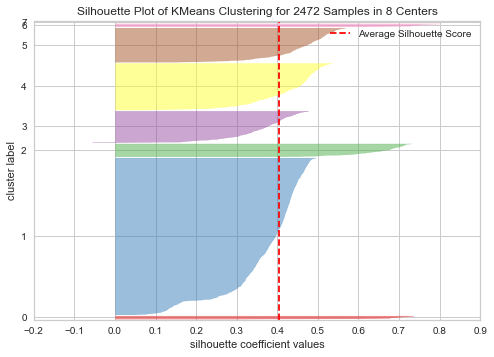

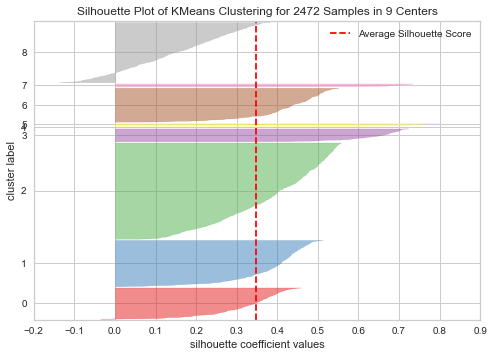

Wall time: 3.43 s


<IPython.core.display.Javascript object>

In [127]:
%%time

# finding optimal no. of clusters with silhouette coefficients

k=[4,7,8,9]
for i in k:
    visualizer = SilhouetteVisualizer(KMeans(i, random_state=1))
    visualizer.fit(subset_scaled_df)
    visualizer.show()

### It actually looks like k=7 is the best

## K-Means Cluster Profile

In [128]:
# Fit the KMeans model to the scaled data
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(subset_scaled_df)

# adding kmeans cluster labels to the original dataframe
sdf["K_means_segments"] = kmeans.labels_
subset_scaled_copy = subset_scaled_df.copy()
subset_scaled_copy["K_means_segments"] = kmeans.labels_

cluster_profile = sdf.groupby("K_means_segments").mean().copy()

cluster_profile["count_in_each_segment"] = (
    sdf.groupby("K_means_segments")["asset_id"].count().values.copy()
)

# Display the means of each column and highlight the maxinum value
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

In [129]:
# Highlight the minimum values

cluster_profile.style.highlight_min(color="yellow", axis=0)

<IPython.core.display.Javascript object>

In [133]:
## Print the names in each cluster

for cluster in sdf["K_means_segments"].unique():
    print("In cluster {}, the following NFTs are present:".format(cluster))
    print(sdf[sdf["K_means_segments"] == cluster]["name"].unique())
    print()

In cluster 0, the following NFTs are present:
['Content Condor' 'Diamond Hands Hen' 'Hot Shit Hornet' 'Rare Robot'
 "You're Gonna Die Fly" '5555 Fan' 'Accountable Ant'
 'Accountable Anteater' 'Adaptable Alien' 'Adventurous Astronaut'
 'Alert Ape' 'Ambitious Angel' 'Amiable Anchovy' 'Amped Aye Aye'
 'Arbitraging Admiral' 'Articulate Armadillo' 'Aspiring Alpaca'
 'Authentic Anaconda' 'Awesome African Civet' 'Bad Intentions'
 'Bad-Ass Bulldog' 'Balanced Beetle' 'Bashful Blobfish'
 'Be The Bigger Person' 'Befuddled Burglar' 'Benevolent Barn Owl'
 'Big Game Bandicoot' 'Boisterous Beaver' 'Bold As Fuck Bat'
 'Bombastic Baboon' 'Boss Bobcat' 'Brave Bison' 'Brilliant Barb'
 'Brilliant Barracuda' 'Bubbly Buzzard' 'Bullish Bull' 'Calm Clam'
 'Candid Clownfish' 'Capable Caterpillar' 'Caring Camel'
 'Charismatic Chameleon' 'Charming Cheetah' 'Cheerful Chipmunk'
 'Chill Chinchilla' 'Clever Crocodile' 'Common Sense Cow'
 'Compassionate Catfish' 'Confident Cobra' 'Considerate Cowboy'
 'Consistent Cou

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Token Type Distribution in K-Means Clustering where k=7')

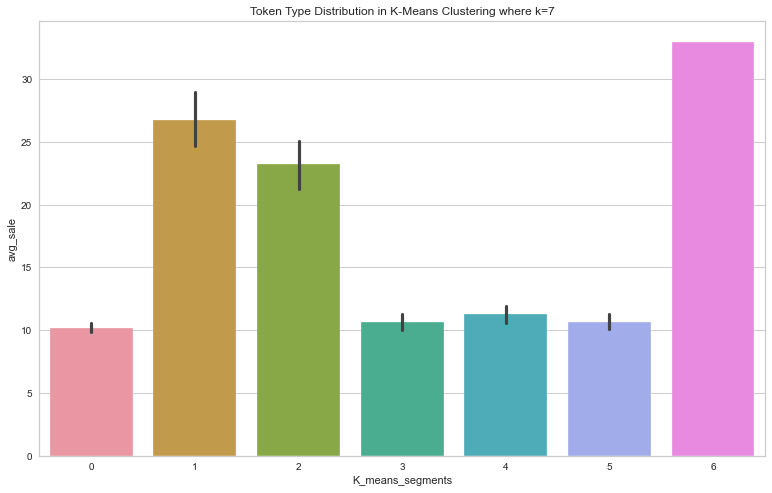

<IPython.core.display.Javascript object>

In [146]:
# What is the distribution of sale prices in each cluster?

plt.figure(figsize=(13, 8))
sns.barplot(data=sdf, x="K_means_segments", y="avg_sale")
plt.title("Token Type Distribution in K-Means Clustering where k=7")

<AxesSubplot:xlabel='unique_owners', ylabel='avg_sale'>

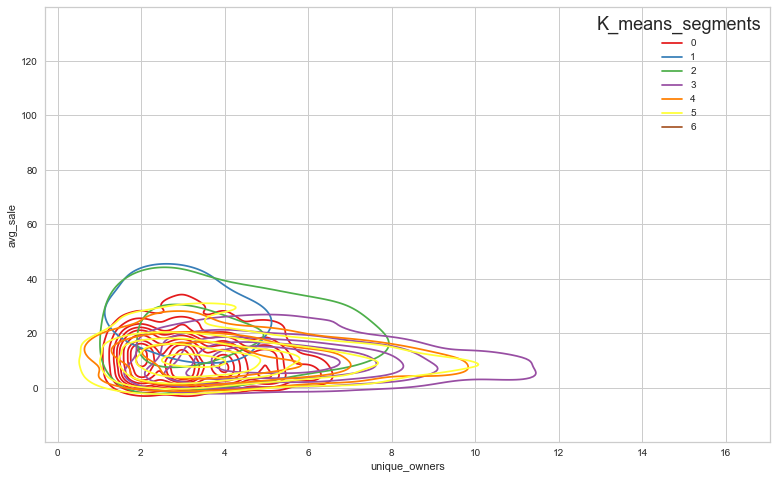

<IPython.core.display.Javascript object>

In [153]:
# Closeup of Contours

plt.figure(figsize=(13, 8))
sns.kdeplot(
    data=sdf, x="unique_owners", y="avg_sale", hue="K_means_segments", palette="Set1"
)

Text(0.5, 1.0, 'Total Owners vs Average Sale where k=7')

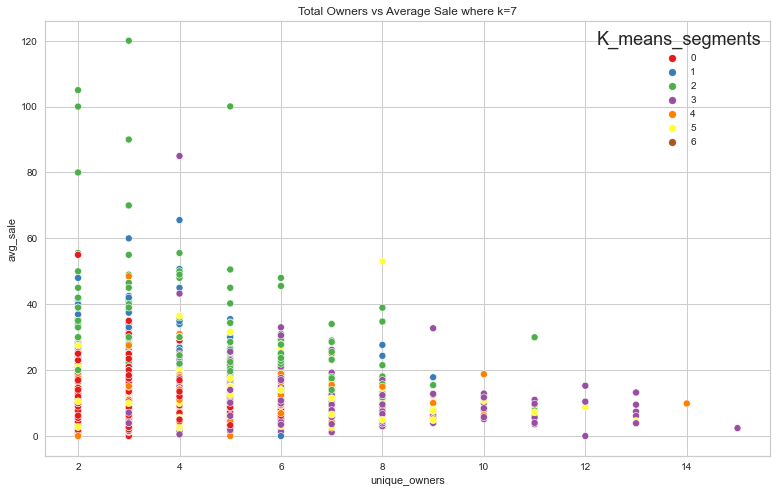

<IPython.core.display.Javascript object>

In [154]:
# What is the distribution of sale prices in each cluster?

plt.figure(figsize=(13, 8))
sns.scatterplot(
    data=sdf, x="unique_owners", y="avg_sale", hue="K_means_segments", palette="Set1"
)
plt.title("Total Owners vs Average Sale where k=7")

Text(0.5, 1.0, 'Token Type Distribution in K-Means Clustering where k=7')

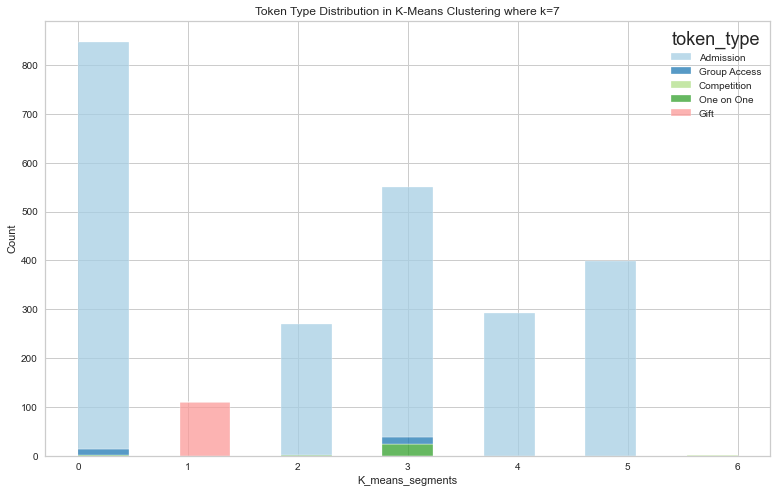

<IPython.core.display.Javascript object>

In [155]:
# What is the distribution of token_type in each cluster?

plt.figure(figsize=(13, 8))
sns.histplot(
    data=sdf,
    x="K_means_segments",
    hue="token_type",
    multiple="stack",
    palette="Paired",
)
plt.title("Token Type Distribution in K-Means Clustering where k=7")

Text(0.5, 1.0, 'Category Distribution in K-Means Clustering where k=7')

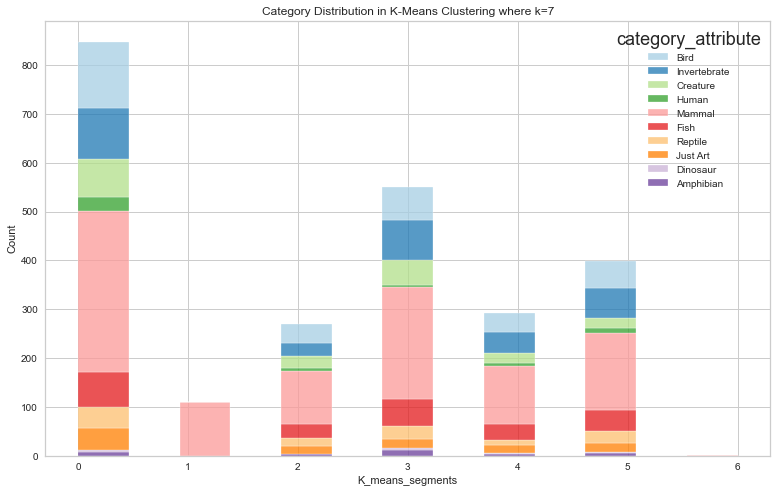

<IPython.core.display.Javascript object>

In [156]:
# What is the distribution of category in each cluster?

plt.figure(figsize=(13, 8))
sns.histplot(
    data=sdf,
    x="K_means_segments",
    hue="category_attribute",
    multiple="stack",
    palette="Paired",
)
plt.title("Category Distribution in K-Means Clustering where k=7")

Text(0.5, 1.0, 'Rarity Distribution in K-Means Clustering where k=7')

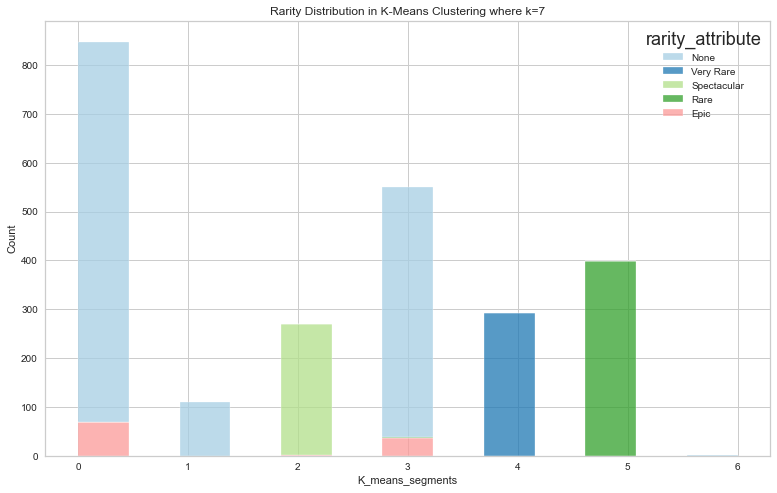

<IPython.core.display.Javascript object>

In [157]:
# What is the distribution of rarity in each cluster?

plt.figure(figsize=(13, 8))
sns.histplot(
    data=sdf,
    x="K_means_segments",
    hue="rarity_attribute",
    multiple="stack",
    palette="Paired",
)
plt.title("Rarity Distribution in K-Means Clustering where k=7")

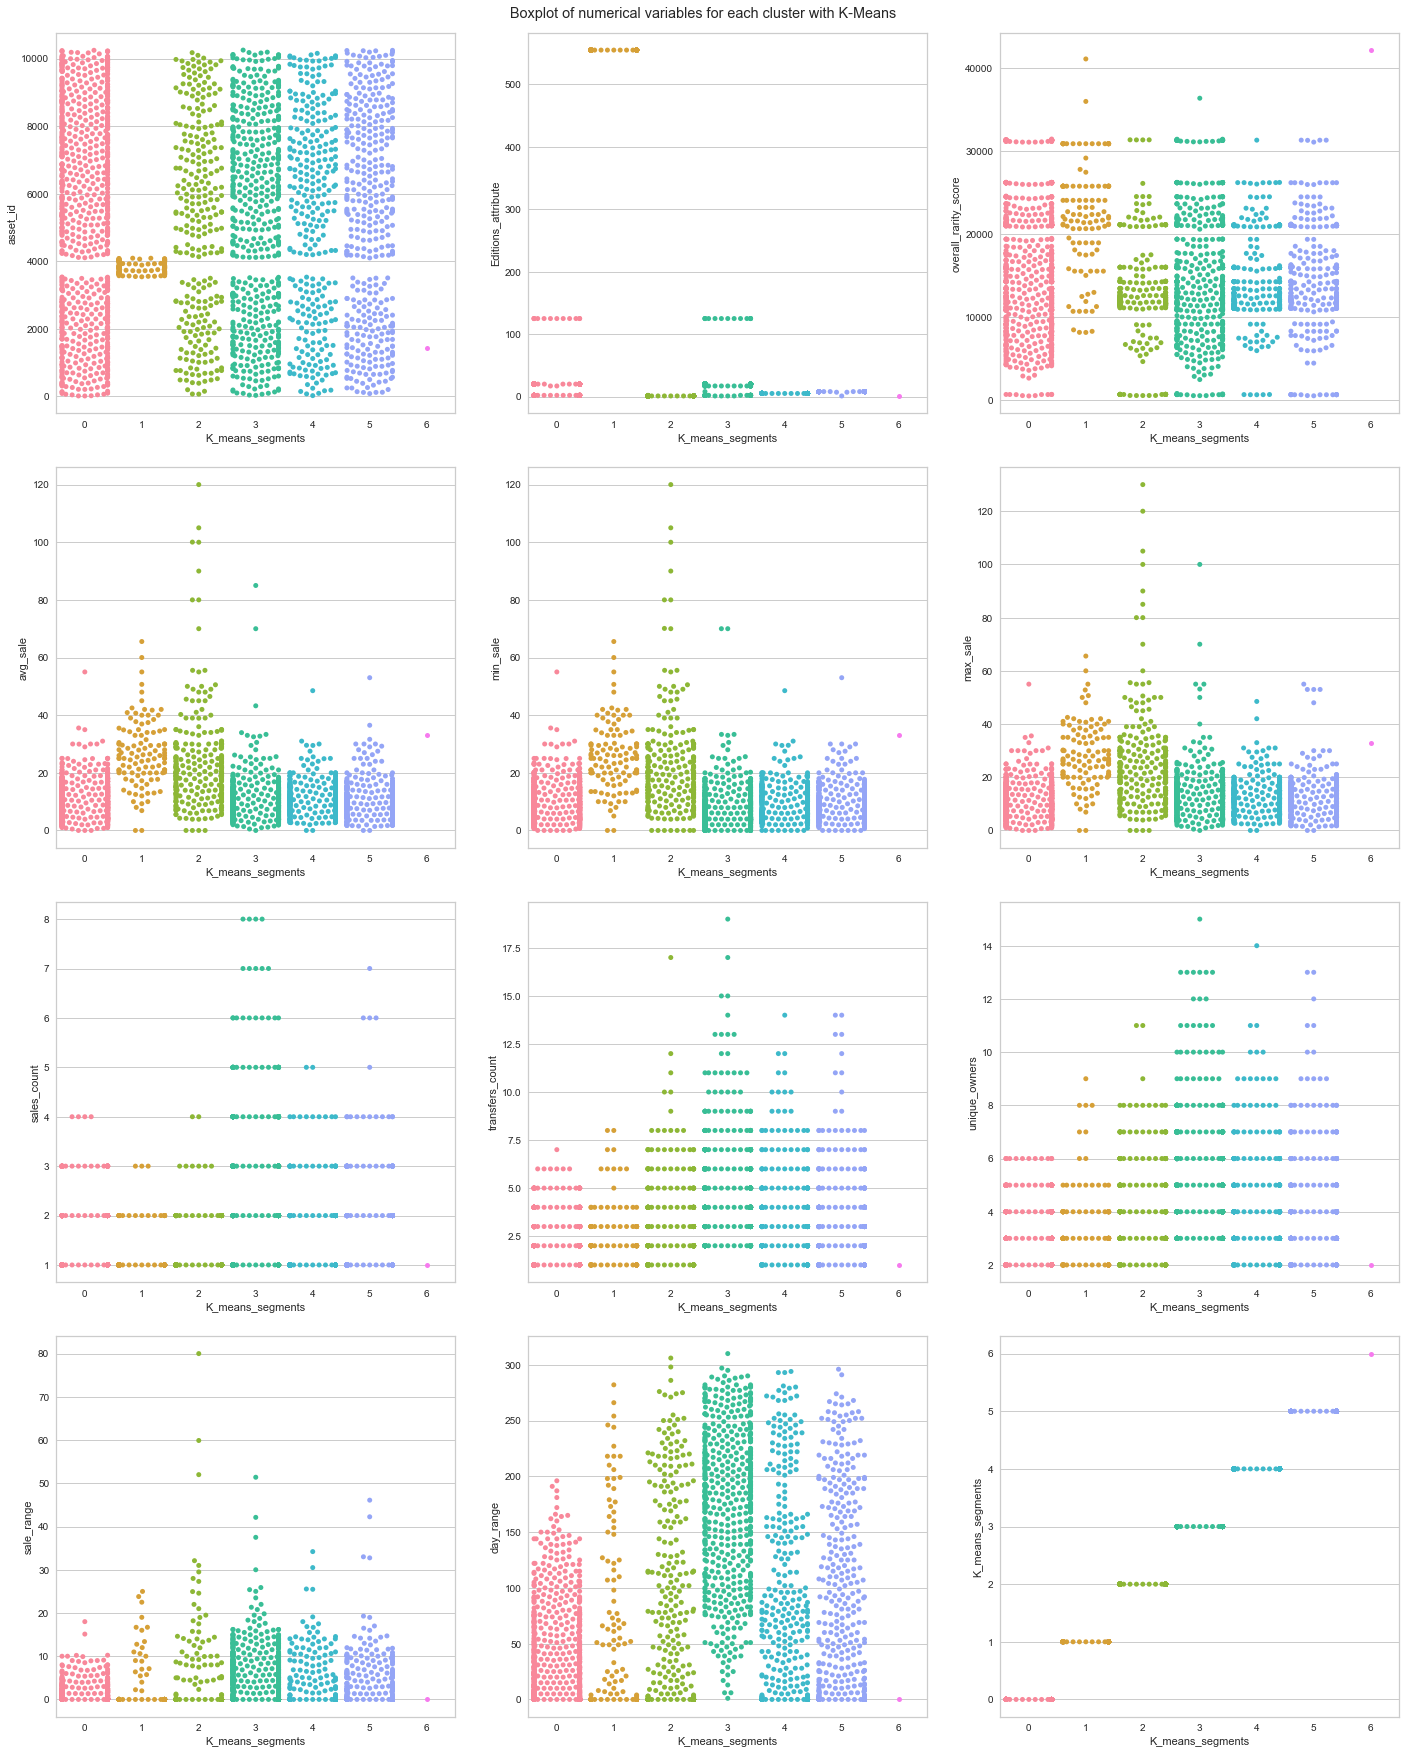

<IPython.core.display.Javascript object>

In [138]:
# Side by side swarmlot comparison of all numeric variables for each cluster

num_col = sdf.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(20, 25))
fig.suptitle("Boxplot of numerical variables for each cluster with K-Means")
counter = 0

for ii in range(4):
    sns.swarmplot(ax=axes[ii][0], y=sdf[num_col[counter]], x=sdf["K_means_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][1], y=sdf[num_col[counter]], x=sdf["K_means_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][2], y=sdf[num_col[counter]], x=sdf["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)


# Hierarchical Clustering

In [158]:
%%time

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9230960830058524.
Cophenetic correlation for Euclidean distance and complete linkage is 0.91414674792668.
Cophenetic correlation for Euclidean distance and average linkage is 0.9568471455842529.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9429764055512848.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9023533703988831.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8414764419040541.
Cophenetic correlation for Chebyshev distance and average linkage is 0.917753409960653.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8976115752903527.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8061570679336276.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6932638606390997.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8225021074896193.
Cophenetic corre

<IPython.core.display.Javascript object>

In [141]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9568471455842529, which is obtained with Euclidean distance and average linkage.
Wall time: 0 ns


<IPython.core.display.Javascript object>

In [142]:
%%time
# list of all linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9230960830058524.
Cophenetic correlation for complete linkage is 0.91414674792668.
Cophenetic correlation for average linkage is 0.9568471455842529.
Cophenetic correlation for centroid linkage is 0.9514098858890359.
Cophenetic correlation for ward linkage is 0.5427762600753402.
Cophenetic correlation for weighted linkage is 0.9429764055512848.
Wall time: 1.78 s


<IPython.core.display.Javascript object>

In [143]:
%%time
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest Euclidean cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest Euclidean cophenetic correlation is 0.9568471455842529, which is obtained with average linkage.
Wall time: 0 ns


<IPython.core.display.Javascript object>

# Observation

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Let's see the dendrograms for the different linkage methods in Euclidean distance.

Wall time: 20.8 s


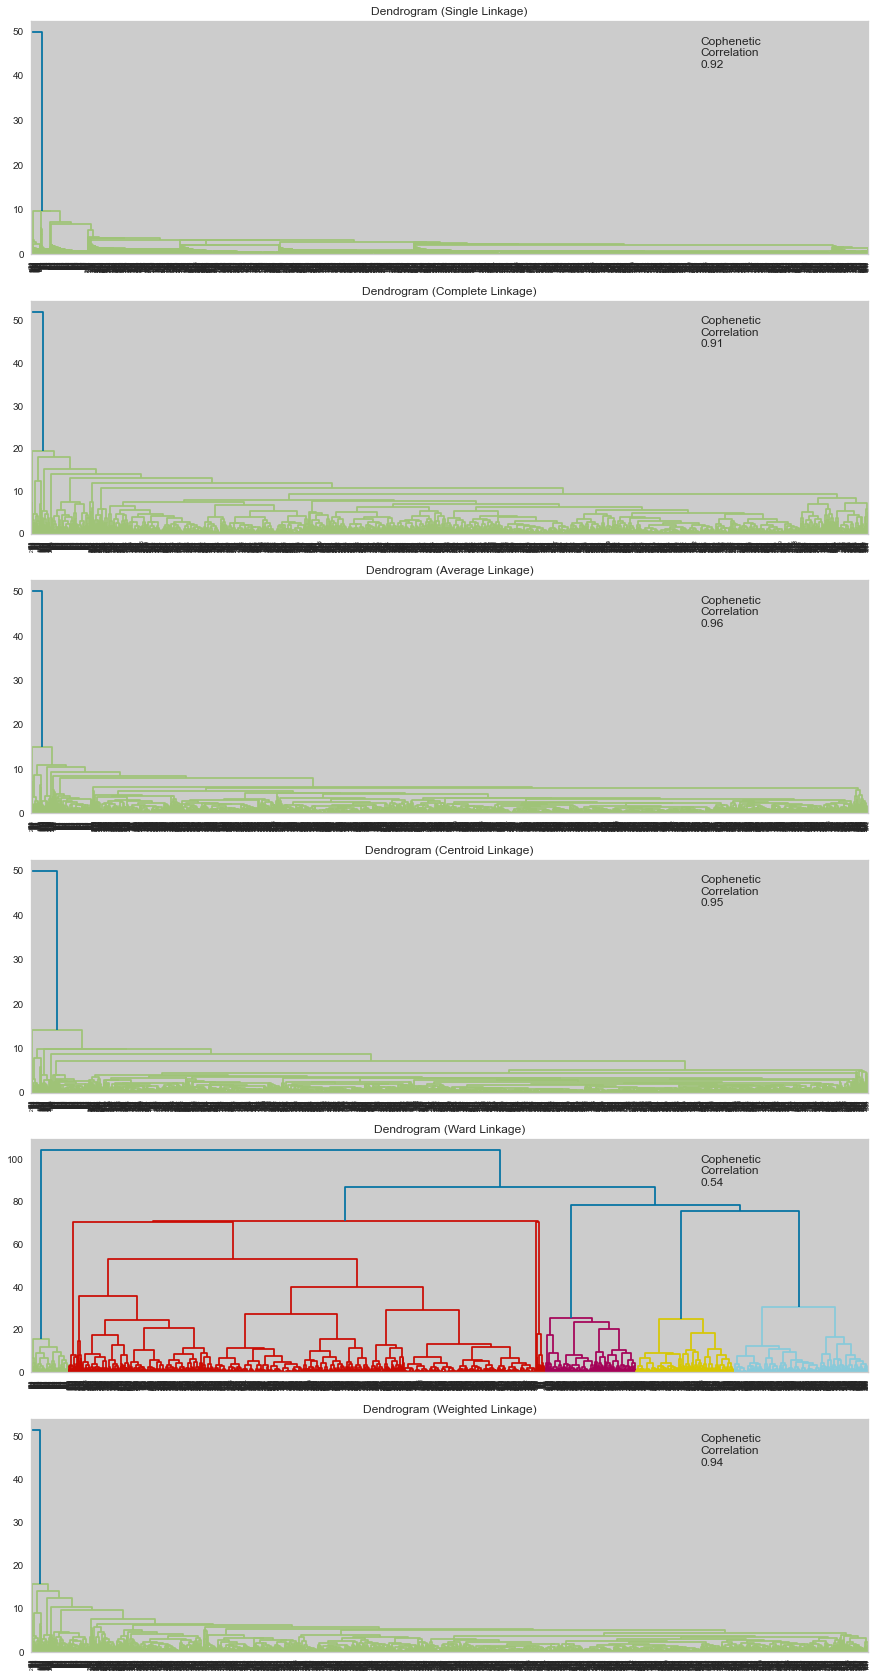

<IPython.core.display.Javascript object>

In [159]:
%%time

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

In [160]:
%%time
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc


Wall time: 2.86 ms


Linkage  Cophenetic Coefficient
4      ward                0.542776
1  complete                0.914147
0    single                0.923096
5  weighted                0.942976
3  centroid                0.951410
2   average                0.956847

<IPython.core.display.Javascript object>

## Observation

### Even though the model using average linkage and Euclidean had the highest cophenetic coefficient, the ward linkage and Euclidean distance dendogram shows the best distributions of clusters.

In [161]:
%%time
# Fit the model with chosen number of clusters
HCmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward') 
HCmodel.fit(subset_scaled_df)

Wall time: 157 ms


AgglomerativeClustering(n_clusters=7)

<IPython.core.display.Javascript object>

In [162]:
%%time

# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_segments"] = HCmodel.labels_
sdf["HC_segments"] = HCmodel.labels_

# view first 5 rows
sdf.head()

Wall time: 1.5 ms


asset_id            name rarity_attribute  Editions_attribute  \
1         8  Content Condor             None                  20   
2         9  Content Condor             None                  20   
3        14  Content Condor             None                  20   
5        18  Content Condor        Very Rare                   5   
7        26  Content Condor             None                  20   

   overall_rarity_score category_attribute token_type  avg_sale  min_sale  \
1          26177.322035               Bird  Admission      4.99      4.99   
2          31311.016988               Bird  Admission     18.40     18.40   
3           8247.937006               Bird  Admission      2.00      2.00   
5          21064.370834               Bird  Admission      6.00      0.00   
7          26215.064087               Bird  Admission      4.30      4.30   

   max_sale first_transaction last_transaction  sales_count  transfers_count  \
1      4.99        2021-07-04       2022-01-16          1.0              2.0   
2     18.40        2021-08-20       2021-12-19          1.0              4.0   
3      2.00        2021-05-27       2021-05-27          1.0              1.0   
5     12.00        2021-08-25       2022-01-23          2.0              3.0   
7      4.30        2021-06-11       2022-01-16          1.0              2.0   

   unique_owners  sale_range  day_range  K_means_segments  HC_segments  
1              3         0.0        196                 0            0  
2              5         0.0        121                 0            0  
3              2         0.0          0                 0            0  
5              4        12.0        151                 4            4  
7              3         0.0        219                 3            0

<IPython.core.display.Javascript object>

In [163]:
# Group the dataset by clusters and display the averages

hcluster_profile = sdf.groupby("HC_segments").mean().drop("K_means_segments", axis=1)

hcluster_profile["count_in_each_segment"] = (
    sdf.groupby("HC_segments")["asset_id"].count().values
)

# Highlight maximum value in each column
hcluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

In [164]:
# Highlight minimum value in each column

hcluster_profile.style.highlight_min(color="yellow", axis=0)

<IPython.core.display.Javascript object>

In [165]:
## Print the companies in each cluster

for cluster in sdf["HC_segments"].unique():
    print("In cluster {}, the following NFTs are present:".format(cluster))
    print(sdf[sdf["HC_segments"] == cluster]["name"].unique())
    print()

In cluster 0, the following NFTs are present:
['Content Condor' 'Diamond Hands Hen' 'Hot Shit Hornet' 'Rare Robot'
 'Turnt Tick' "You're Gonna Die Fly" '5555 Fan' 'Accountable Ant'
 'Accountable Anteater' 'Adaptable Alien' 'Adventurous Astronaut'
 'Alert Ape' 'Ambitious Angel' 'Amiable Anchovy' 'Amped Aye Aye'
 'Arbitraging Admiral' 'Articulate Armadillo' 'Aspiring Alpaca'
 'Authentic Anaconda' 'Awesome African Civet' 'Bad Intentions'
 'Bad-Ass Bulldog' 'Balanced Beetle' 'Bashful Blobfish'
 'Be The Bigger Person' 'Befuddled Burglar' 'Benevolent Barn Owl'
 'Big Game Bandicoot' 'Boisterous Beaver' 'Bold As Fuck Bat'
 'Bombastic Baboon' 'Boss Bobcat' 'Brave Bison' 'Breakfast Bat'
 'Brilliant Barb' 'Brilliant Barracuda' 'Bubbly Buzzard' 'Bullish Bull'
 'Calm Clam' 'Candid Clownfish' 'Capable Caterpillar' 'Caring Camel'
 'Charismatic Chameleon' 'Charming Cheetah' 'Cheerful Chipmunk'
 'Chill Chinchilla' 'Clever Crocodile' 'Common Sense Cow'
 'Compassionate Catfish' 'Confident Cobra' 'Conside

<IPython.core.display.Javascript object>

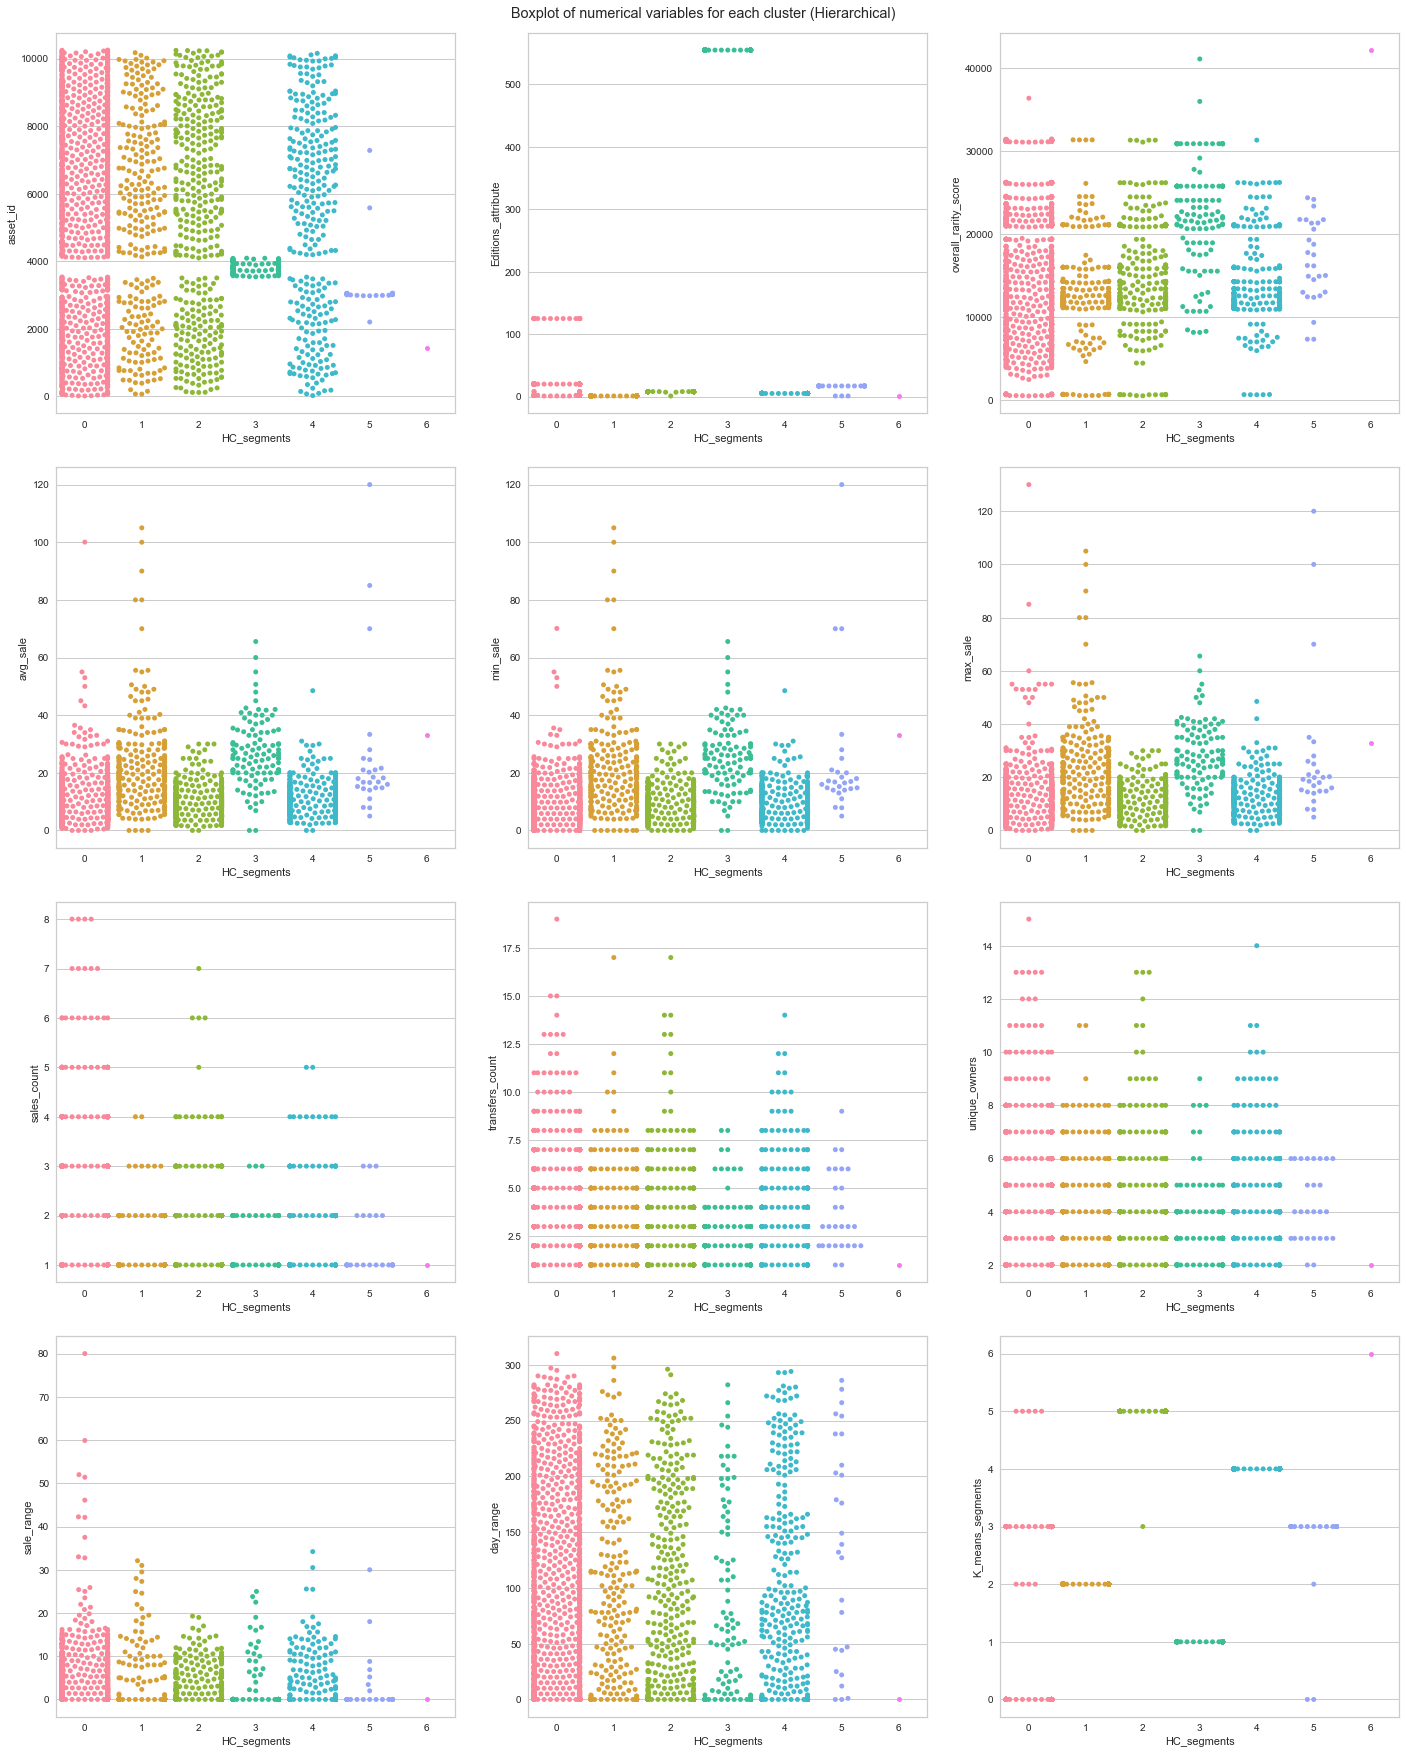

<IPython.core.display.Javascript object>

In [166]:
# Side by side Boxplot comparison of all 11 variables for each cluster

num_col = sdf.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(20, 25))
fig.suptitle("Boxplot of numerical variables for each cluster (Hierarchical)")
counter = 0

for ii in range(4):
    sns.swarmplot(ax=axes[ii][0], y=sdf[num_col[counter]], x=sdf["HC_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][1], y=sdf[num_col[counter]], x=sdf["HC_segments"])
    counter = counter + 1
    sns.swarmplot(ax=axes[ii][2], y=sdf[num_col[counter]], x=sdf["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

Text(0.5, 1.0, 'Variation between attributes in K-Means Clustering')

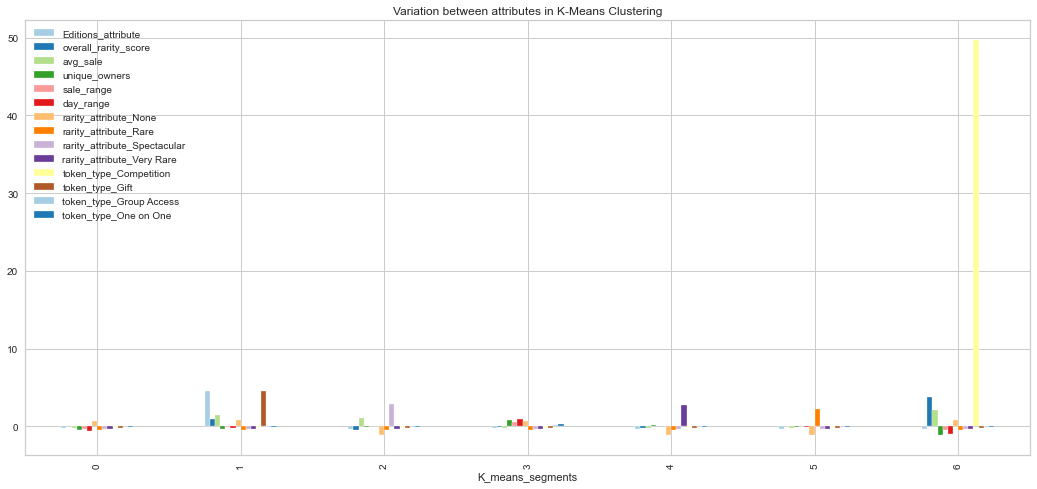

<IPython.core.display.Javascript object>

In [167]:
subset_scaled_copy.groupby("K_means_segments").mean().plot.bar(
    figsize=(18, 8), color=sns.color_palette("Paired")
)
plt.title("Variation between attributes in K-Means Clustering")

Text(0.5, 1.0, 'Variation between attributes in Hierarchical Clustering')

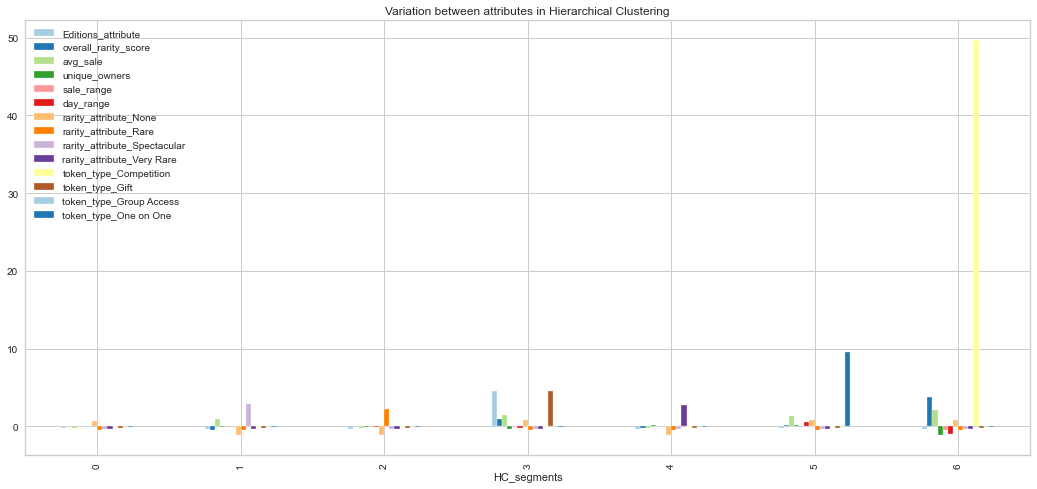

<IPython.core.display.Javascript object>

In [168]:
subset_scaled_df.groupby("HC_segments").mean().plot.bar(
    figsize=(18, 8), color=sns.color_palette("Paired")
)
plt.title("Variation between attributes in Hierarchical Clustering")

### The 7 clusters from each method seem pretty similar.

Now, finally, what I would like to do is re-run some of the EDA from earlier (such as time series) with the HUE of segments.

In [171]:
sdf.head()

asset_id            name rarity_attribute  Editions_attribute  \
1         8  Content Condor             None                  20   
2         9  Content Condor             None                  20   
3        14  Content Condor             None                  20   
5        18  Content Condor        Very Rare                   5   
7        26  Content Condor             None                  20   

   overall_rarity_score category_attribute token_type  avg_sale  min_sale  \
1          26177.322035               Bird  Admission      4.99      4.99   
2          31311.016988               Bird  Admission     18.40     18.40   
3           8247.937006               Bird  Admission      2.00      2.00   
5          21064.370834               Bird  Admission      6.00      0.00   
7          26215.064087               Bird  Admission      4.30      4.30   

   max_sale first_transaction last_transaction  sales_count  transfers_count  \
1      4.99        2021-07-04       2022-01-16          1.0              2.0   
2     18.40        2021-08-20       2021-12-19          1.0              4.0   
3      2.00        2021-05-27       2021-05-27          1.0              1.0   
5     12.00        2021-08-25       2022-01-23          2.0              3.0   
7      4.30        2021-06-11       2022-01-16          1.0              2.0   

   unique_owners  sale_range  day_range  K_means_segments  HC_segments  
1              3         0.0        196                 0            0  
2              5         0.0        121                 0            0  
3              2         0.0          0                 0            0  
5              4        12.0        151                 4            4  
7              3         0.0        219                 3            0

<IPython.core.display.Javascript object>

In [173]:
# Make an association list that links asset ids to segments
idsegments = sdf[["asset_id", "K_means_segments", "HC_segments"]]
idsegments.head()

asset_id  K_means_segments  HC_segments
1         8                 0            0
2         9                 0            0
3        14                 0            0
5        18                 4            4
7        26                 3            0

<IPython.core.display.Javascript object>

In [183]:
idsegments.shape

(2472, 3)

<IPython.core.display.Javascript object>

In [184]:
df.dropna().shape

(3991, 18)

<IPython.core.display.Javascript object>

In [185]:
# Join these segment columns to our df column back up at the top and call it labeled

labeled = df.dropna().merge(idsegments, on="asset_id", how="outer")
labeled.shape

(3991, 20)

<IPython.core.display.Javascript object>

In [186]:
labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 0 to 3990
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3991 non-null   datetime64[ns]
 1   asset_id              3991 non-null   int64         
 2   from_address          3991 non-null   object        
 3   to_address            3991 non-null   object        
 4   transaction_hash      3991 non-null   object        
 5   type                  3991 non-null   object        
 6   sale_price_eth        3991 non-null   float64       
 7   sale_price_usd        3991 non-null   float64       
 8   name                  3991 non-null   object        
 9   rarity_attribute      3991 non-null   object        
 10  Editions_attribute    3991 non-null   int32         
 11  overall_rarity_score  3991 non-null   float64       
 12  category_attribute    3991 non-null   object        
 13  benefit_attribute 

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Timeline of NFT sales in Ethereum by K Means Segment')

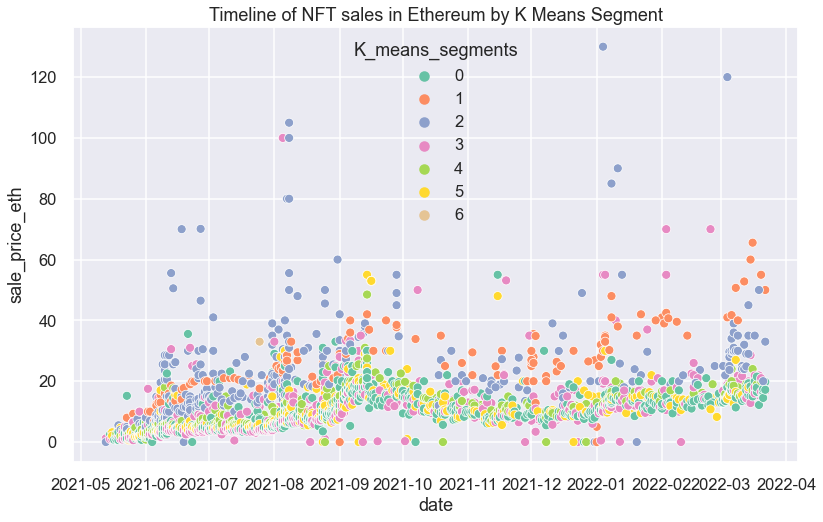

<IPython.core.display.Javascript object>

In [204]:
sns.set_style("darkgrid")
sns.set_context("talk")

plt.figure(figsize=(13, 8))

sns.scatterplot(
    data=labeled,
    x="date",
    y="sale_price_eth",
    palette="Set2",
    legend="brief",
    hue="K_means_segments",
)
plt.title("Timeline of NFT sales in Ethereum by K Means Segment")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Text(0.5, 1.0, 'Timeline of NFT sales in Ethereum by HC Segment')

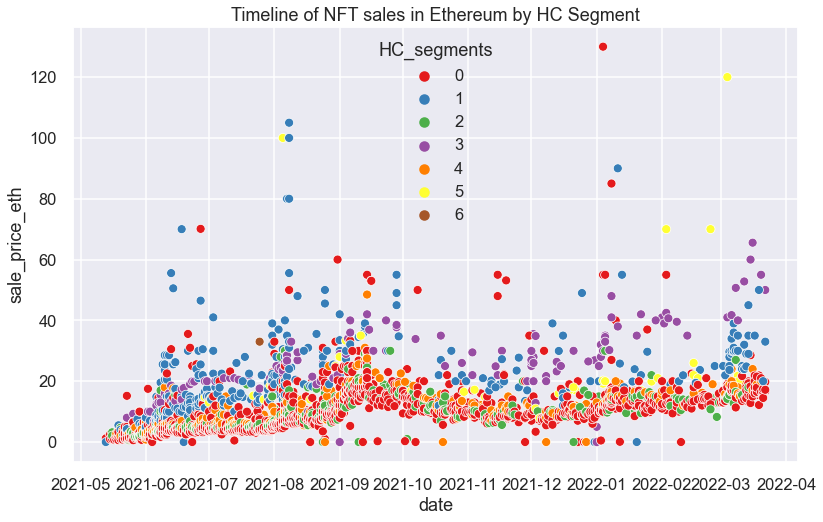

<IPython.core.display.Javascript object>

In [211]:
plt.figure(figsize=(13, 8))

sns.scatterplot(
    data=labeled,
    x="date",
    y="sale_price_eth",
    palette="Set1",
    legend="brief",
    hue="HC_segments",
)
plt.title("Timeline of NFT sales in Ethereum by HC Segment")

## Observation
- Yes, there does appear to be some clustering going on here in the time-series graph of both clustering methods

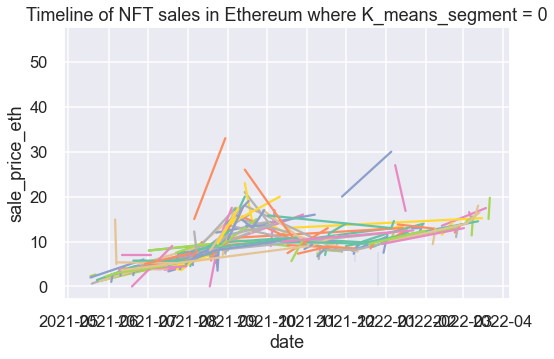

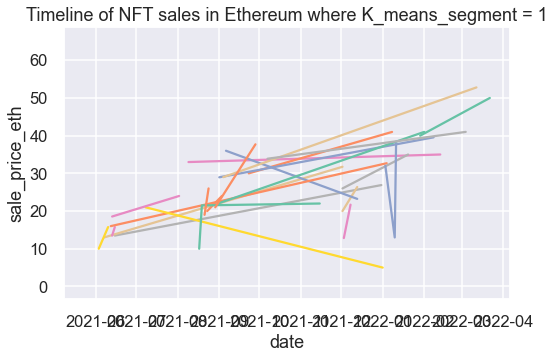

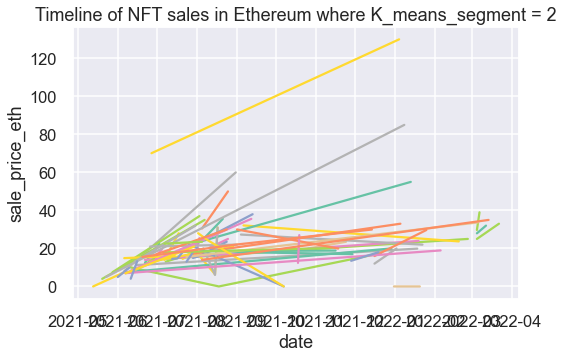

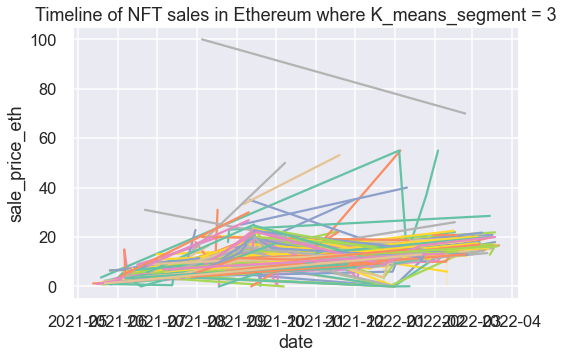

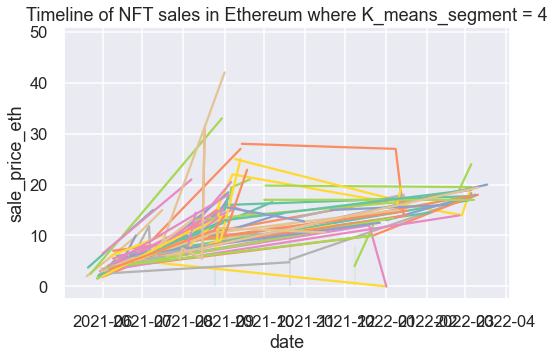

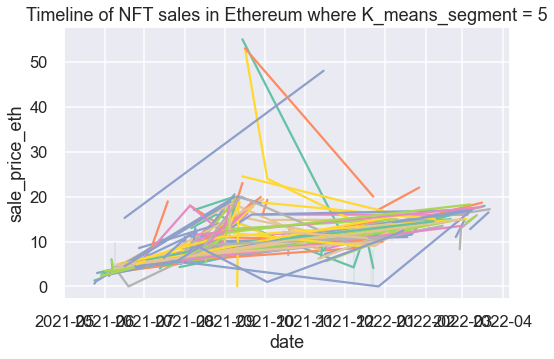

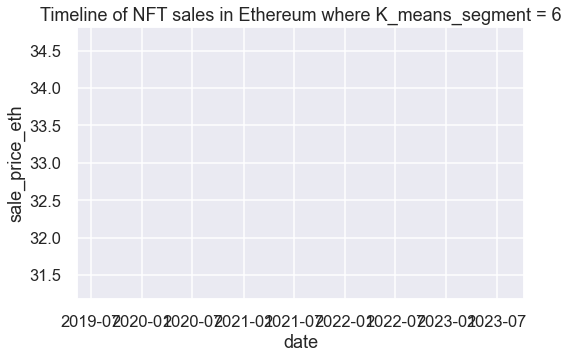

<IPython.core.display.Javascript object>

In [228]:
for i in range(0, 7):

    plt.figure(figsize=(8, 5))
    sns.lineplot(
        data=labeled.loc[labeled["K_means_segments"] == i],
        x="date",
        y="sale_price_eth",
        palette="Set2",
        hue="asset_id",
        legend=False,
    )
    plt.title("Timeline of NFT sales in Ethereum where K_means_segment = " + str(i))

# 3. Share Insights

### Key Take-aways:
- 